# Project: Wrangling and Analyze Data - Twitter API - WeRateDogs

### Table of contents

<ul>
<li><a href = "#gather">Step 1: Data Gathering</a></li>  
<li><a href = "#assess">Step 2: Assessing Data</a></li>
<li><a href = "#clean">Step 3: Cleaning Data</a></li>
<li><a href = "#store">Step 4: Storing Data</a></li>
<li><a href = "#analyze">Step 5: Analyzing and Visualizing Data</a>
<ul>

<a id='gather'></a>
## Step 1: Data Gathering

<div class="alert alert-block alert-info">
<b>Separate markdown cells with brief directions have been included to make the steps in this stage clearly identifiable</b>
</div>

<b>1. Import the general libraries that work a lot with numbers (pandas and numpy).</b> 

- _collecting all the liitle pieces together and converting them into pandas dataframes_

In [284]:
# importing general libraries that work with data often 
    
import pandas as pd
import numpy as np

- _pandas cuts across with so many functions in it_

- _numpy is mainly intended for mathematical operations_

<b>2. Next, import the libraries that are closely related to Twitter APIs' operations and file handling.</b> 

In [285]:
# importing specialised libraries that will come in handy later

import tweepy as ty
import requests 
import json
import re

- _tweepy is an open source python package intended to access the twitter API using python_

<b>3. Import the libraries with graph related in-built functions as well as a warnings library to keep the code clean of any random warning messages</b>

In [286]:
# importing a graph specific library and one that will clear the pink warning pop-up messages

import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

- _matplotlib library is used to display attractive plots and visualizations_

- _the warnings library is imported to hide warning messages in order to keep the work tidy_

<b>4. Import packages that will aid with authentication while highlighting execution timing from the relevant libraries.</b>

In [287]:
# importing twitter API anaylsis relevant libraries

from tweepy import OAuthHandler
from timeit import default_timer as timer

- _OAuthHandler is used for the authentication process_

- _default-timer returns the default time when executed_

<b>5. Load the provided twitter archive enhanced csv file into a pandas dataframe.</b>

In [288]:
# loading the twitter-archive-enhanced csv file into a pandas DataFrame

twi_arc_enh_1 = pd.read_csv('twitter-archive-enhanced.csv')

- _assigned variable name uses a three-letter prefix for each word in file name_

In [289]:
# inspecting the first three rows of the twi_arc_enh_1 pandas dataframe

twi_arc_enh_1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


- _the df.head(3) displays the first three rows of the pandas dataframe as shown above_

<b>6. Extract the image prediction data from the provided url address and write them into a tsv file.</b>

In [290]:
# assigning the udacity server url to a new variable name

image_predictions_url_1 = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"


- _udacity provided a url with an image prediction file which it requires us to retrieve and use for the project_

In [291]:
# sending an HTTP response to the Udacity server and saving the response in a variable 

tsv_image_response_object = requests.get(image_predictions_url_1)


- _the requests library is used as a standard to make HTTP requests in python_

- _the get() method sends a get request to the url input by the user as a parameter_

In [292]:
# saving response as a tsv file writing content to a new file in binary format 

with open("image_predictions.tsv", 'wb') as tsv_file_binary:
    tsv_file_binary.write(tsv_image_response_object.content)

- _with open() function is used to open the file_

- _'wb' mode refers to writing mode in binary form_

- _the write() method is used to write the received server response into the open file_ 

In [293]:
# loading the image_predictions.tsv file into a pandas DataFrame

ima_pred_1 = pd.read_csv("image_predictions.tsv",sep = '\t')

- _the '\t' separator is used by the pandas library to draw data row and column boundaries for every tab space in the file_ 

In [294]:
# inspecting the first three rows for ima_pred_1 pandas dataframe

ima_pred_1.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


- _the 'p' data column name means 'prediction'_

- _the 'p-conf' data column name means prediction 'confidence level'_

- _the 'p-dog' data column name stands for 'prediction is dog'_

<b>7. Use the confidential keys provided to you by the twitter API developer account to access and retrieve the 'weratedogs' tweets as well as any other related information.</b> 

In [ ]:
# the variable names below are vital for the authentication process in order to be granted access to twitter's API data

# These are hidden to comply with Twitter's API terms and conditions

consumer_key = ''

consumer_secret = ''

access_token = ''

access_secret = ''

- _the project motivation encourages us to keep them secret and not to share them when we submit the project work for review_


In [ ]:
# creating API object to be used in gathering the twitter data

auth = ty.OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_secret)


api = ty.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


- _the 'wait-on-rate-limit' parameter is set to True to delegate the waiting to the API instance to automatically wait for rate, limits to replenish and to avoid being blacklisted by Twitter if our developer account keeps sleeping now and then_

In [ ]:
# isolating tweet IDs for which additional data via twitter's API is to be gathered

tweet_ids = twi_arc_enh_1.tweet_id.values

len(tweet_ids)


- _'.values' returns all the data values in the 'tweet-id' data column of the twi-arc-enh-1 pandas dataframe and ignores the axes labels_ 

- _the len() function counts and returns the total number of elements present in the 'tweet-ids' list_

In [ ]:
# preparing to query twitter's API for JSON data for each tweet ID in the Twitter archive

count = 0

fail_tweet_ids = []

starting_time = timer()


- _assigning a count variable name to a zero numeric value to facilitate with the counting of each tweet ID chronogically_

- _creating an empty dictionary to gather tweet IDs that do not have additional information from Twitter_

- _initializing the timer using a 'starting-time' variable name_

In [ ]:
# each tweet's returned JSON is to be saved as a new line in a text file

# overwriting tweet_json text file
with open('tweet_json.txt', 'w') as new_file:
    
    for tweet_id in tweet_ids:
        
        count+=1
        
        print(str(count)+":"+str(tweet_id))
        
        print(' ')
        
        try: 
             # replacing a text attribute with a full text attribute
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            
            print("Success, twitter API returned some additional information")
            
            print(' ')
            
            # converting the new_file text file into a json file
            json.dump(tweet._json, new_file)
            
            new_file.write('\n')
        
        except:
            
            print("Sorry, twitter API couldn't find additional information on this tweet_id")
            
            print(' ')
            
            # adding each failed tweet_id into empty list 
            fail_tweet_ids.append(tweet_id)
            
            
        
finishing_time = timer()


k = (finishing_time - starting_time)

print('The process ran for ' + str(k) +' seconds')

print(' ')

print(fail_tweet_ids)

print(' ')

print(str(len(fail_tweet_ids)) + ' tweet_ids did not have additional tweet data with them')

- _with open() function in write only mode overwrites the tweet-json text file as a new file called new-file_


- _extended mode in the get-status() function returns a full-text attribute in the place of a text attribute which contains the entire untruncated text of the tweet._


- _using the json.dump() function writes the python serialized object as JSON formatted data into a file._


- _twitter requires all requests to use OAuth for authentication_

<b>8. Load the updated tweet-json file into a pandas dataframe.</b>

In [295]:
# reading the tweet_json file as a json object per line

twi_arc_enh_2 = pd.read_json('tweet_json.txt', lines=True)

In [296]:
twi_arc_enh_2.head(7)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",33638,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,6953,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29173,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5259,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",21945,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3462,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",36720,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7171,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",35115,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,7704,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",17719,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,2578,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",10311,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,1644,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


- _creating a pandas dataframe for the tweet-json file_ 

<a id='assess'></a>
## Step 2: Assessing Data<br>



<div class="alert alert-block alert-info">
<b>Clarity has been added to the prediction column issues in the assessment stage, related data type issues have been placed under one category, and changes applied to the cleaning stage, the rating_numerator changes have been clarrified and they stress the conversion of the original digits to a simplified form that can be standardized</b>
</div>

### Observations

#### Tidiness Issues to be cleaned

- <a href='#dog-stage'>F. There are four distinct data columns for the dog growth stages</a><br>
- <a href='#extension'>G. The twitter additional dataframe is an extension of the twitter archived dataframe</a><br> 
- <a href='#prediction'>H. p1, p2, and p3 may need one prediction data column, p1_conf, p2_conf, and p3_conf may need one confidence-level<br>data column, p1_dog, p2_dog and p3_dog may need one dog-breed data column as well.</a><br>
- <a href='#red-rep'>K. twi_arc_enh_2 and twi_arc_enh_1 pandas dataframe have repeated and redudant data columns</a><br>
#### Quality Issues to be cleaned<br>
- <a href='#uppercase'>A. the name data column in twi_arc_enh_1 pandas dataframe has uppercase characters coming first</a><br>
- <a href='#source'>B. the source data column has html links mixed up with device identity</a><br>
- <a href='#urladd'>C. the text data column still has url addresses in it</a><br>
- <a href='#names'>D. the name data column has some wrong entries for names and some of these are pronouns, adjectives, verbs</a><br>
- <a href='#originalimg'>E. keep images with original ratings</a><br>
- <a href='#datatypes'>I. Incorrect data types for the timestamp, tweet_id, and the dog_breed data columns.</a><br> 
- <a href='#ratingnum'>J. the rating_numerator data column has some wrong entries</a><br>
- <a href='#ratingden'>L.the rating_denominator has a minimum value of zero which is not mathematically feasible</a><br>
- <a href='#urlexp'>M. expanded urls data column has repeated url addresses</a><br>
- <a href='#RT'>N. the text data column has data values that begin with 'RT @'</a><br>

- _defining functions below to assist with the inspection process_ 

In [297]:
# defining a function that focuses on columns and rows

def inspection_1(a):
    
    print(a.shape)
    print(' ')
    print(a.index)
    print(' ')
    print(a.columns)
    

- _the '.shape' function returns the number of rows by columns in parentheses_


- _the '.index' function returns a total number of rows as range index and row count as integer series_ 


- _the '.columns' function returns a list of the column labels_ 

In [298]:
# defining a function that focuses on pandas dataframe summaries

def inspection_2(a):
    print(a.info())
    print(' ')
    return(a.describe())

- _the '.info()' function returns wholesome information about a pandas dataframe in form of a summary_


- _the pandas dataframe describe() method returns a brief description of the dataframe containing mean, percentiles, count, max and min values among others_ 

In [299]:
# defining collective functions that return a given portion of the pandas dataframe 

def head(a):
    return(a.head(7))

def tail(a):
    return(a.tail(7))

def sample(a):
    return(a.sample(7))

def sample_1(a): 
    return(a.sample(frac=.10))

- _the '.head()' method returns the first five rows of the pandas dataframe by default unless the user specifies the number as an argument in the parentheses as shown above_


- _the '.tail()' method returns the last five rows of the pandas dataframe by default unless the user specifies the number as an argument_


- _the'.sample()' method returns a specified number of rows and one row if a number is not specified_


In [300]:
# defining functions focussed on the values of a pandas series 

def unique(a):
    return(a.unique())

def unique_count(a):
    print(a.nunique())
    

- _the '.unique()' method returns unique data from the pandas dataframe series_


- _the '.nunique()' method returns the number of unique values per data column in the pandas dataframe_

In [301]:
# defining functions focussed on data types and unique value counts 

def value_count(a):
    return(pd.cut(a, bins=10).value_counts())

def dtypes(a):
    return(a.dtypes)


- _'dtypes()' pandas method returns a series with a data type for each column_


- _'value-count()' pandas method returns a series containing counts for each unique value_

In [302]:
# defining a function that returns a complete a display of a pandas dataframe 
# which includes data columns of all data types including the object data type

# defining a function focussed on returning the pandas dataframe 
# with dispalyed data columns that do not have object as their datatype in the second part.

def dtypes_object(a):
    return(a.select_dtypes(include='object'))

def dtypes_other(a):
    return(a.select_dtypes(exclude='object'))

- _when the dtypes pandas method is used on a pandas data column with values that have mixed data types, the method returns an object data type for that particular data column_


- _therefore in the first part, a mixed data type column will be kept in the pandas dataframe_


- _therefore in the second part, a mixed data type column will not be kept in the pandas dataframe since it will also be recognized to have an object data type_

<a id='uppercase'></a>
<b>A. the name data column in twi_arc_enh_1 pandas dataframe has uppercase characters coming first</b>

In [303]:
# returning a sample view of 7 data rows for the name data column in the twi-arc-enh-1 pandas data frame

sample(twi_arc_enh_1[['name']])

,name
500,Toby
1814,None
124,Cooper
1985,Cheryl
312,Lola
2314,a
703,Lucy


- _all the data values in the name data column begin with uppercase characters_ 

<a id='source'></a>
<b>B. the source data column has html links mixed up with device identity</b>

In [304]:
# returning a sample of 7 random data rows from the source data column of the twi_arc_enh_1 pandas dataframe
for i in [10, 100, 1000, 2000]:
    print(twi_arc_enh_1.loc[i]['source'])

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


- _html links are displayed for the randomly selected row indices as shown above with their data values_

In [305]:
# returning a sample of 7 random data rows from the source data column of the twi_arc_enh_2 pandas dataframe 
for i in [20, 200, 1200, 2200]:
    print(twi_arc_enh_2.loc[i]['source'])

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


<a id='urladd'></a>
<b>C. the text data column still has url addresses in it</b>

In [306]:
#  invoking the head() function on the twi_arc_enh_1 pandas dataframe to return 7 data rows of 

#  the text data column as specified in the earlier steps of defining the head() function

head(twi_arc_enh_1['text'])

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
5    Here we have a majestic great white breaching ...
6    Meet Jax. He enjoys ice cream so much he gets ...
Name: text, dtype: object

- _most of the text data column value entries contain spcecific names of each of the dogs being looked at with sharp focus_


- _they also include a mixture of the assigned twitter ratings and somthing like a url address_

In [307]:
# defining a function to help us investigate the text data column 

# more closely to help us verify some of the observations I pointed out earlier

def investigate_text_column():
    for i in range(7):
        print(twi_arc_enh_1.iloc[i][5]) 
        print(' ')

- _print(twi-arc-enh-1.iloc**) helps us to display all the values stored in each data row with more clarity_


- _the range(7) python function helps us to create a list of 7 digits from 0 to 6_


- _this enables us to explore data rows in the twi-arc-enh-1 pandas dataframe with indices from 0 to 6_

In [308]:
# hence we go ahead to invoke the investigate-text-column() function 

# to help us explore the text data column more and to confirm some of these suspicions ourselves_ 

investigate_text_column()

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
 
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
 
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
 
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
 
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
 
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
 
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfAs1

- _atleast for each text data column row, a url addres and a twitter rating are common for all data rows_


- _in the text data column rows displayed above, some have hidden names and on will need to look carefully to spot them_

In [309]:
# here, we invoke the defined sample() function to display 7 rows of the 'twi_arc_enh_1' pandas dataframe

sample(twi_arc_enh_1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1451,695794761660297217,NaN,NaN,2016-02-06 02:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. His throne is modeled after him...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695794761...,13,10,Wyatt,None,None,None,None
1720,680145970311643136,NaN,NaN,2015-12-24 22:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kawhi. He was doing fine until hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680145970...,10,10,Kawhi,None,None,pupper,None
1966,673343217010679808,NaN,NaN,2015-12-06 03:28:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S SO SMALL ERMERGERF 11/10 https://t.co/dNU...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673343217...,11,10,None,None,None,None,None
2004,672466075045466113,NaN,NaN,2015-12-03 17:23:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franq and Pablo. They're working hard ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672466075...,12,10,Franq,None,None,None,None
1406,699088579889332224,NaN,NaN,2016-02-15 04:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charl. He's a bully. Chucks that dumbb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699088579...,3,10,Charl,None,None,None,None
914,757393109802180609,NaN,NaN,2016-07-25 01:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo completely oblivious to the dou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757393109...,10,10,None,doggo,None,None,None
620,796125600683540480,NaN,NaN,2016-11-08 23:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",#ImWithThor 13/10\nhttps://t.co/a18mzkhTf6,NaN,NaN,NaN,https://twitter.com/king5seattle/status/796123...,13,10,None,None,None,None,None


- _the returned 7 data rows are picked randomly by the system_

In [310]:
# invoking the sample_1() function on the 'twi_arc_enh_1' pandas dataframe which displays 1/10 of the total dataframe rows

sample_1(twi_arc_enh_1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
147,863432100342583297,NaN,NaN,2017-05-13 16:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Belle. She's never been more pupset. E...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863432100...,12,10,Belle,None,None,None,None
1988,672834301050937345,NaN,NaN,2015-12-04 17:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Ed. He's not mad, just disappointed. 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/672834301...,10,10,Ed,None,None,None,None
2080,670823764196741120,NaN,NaN,2015-11-29 04:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He's a man dime. 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670823764...,12,10,Remington,None,None,None,None
1697,681231109724700672,NaN,NaN,2015-12-27 21:52:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I just love this pic. 11/10 this pupper is goi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681231109...,11,10,None,None,None,pupper,None
308,835574547218894849,NaN,NaN,2017-02-25 19:37:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eli. He works backstage at Bone Jovi c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835574547...,11,10,Eli,None,None,None,None
2022,672068090318987265,NaN,NaN,2015-12-02 15:01:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's upset because he's no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672068090...,7,10,Gizmo,None,None,None,None
1507,691675652215414786,NaN,NaN,2016-01-25 17:35:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Richie and Plip. They are the best of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691675652...,10,10,Richie,None,None,None,None
1588,686730991906516992,NaN,NaN,2016-01-12 02:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I just love this picture. 12/10 lovely af http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686730991...,12,10,None,None,None,None,None
1901,674646392044941312,NaN,NaN,2015-12-09 17:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous dogs here. Little waddling dog is...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674646392...,5,10,None,None,None,None,None
1131,728986383096946689,NaN,NaN,2016-05-07 16:34:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Puff. He started out on the streets (f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728986383...,11,10,Puff,None,None,None,None


- _when invoked the sample-1() function will return 236 data rows which are equivalent 1/10 of the total 2356 data rows_  

<a id='names'></a>
<b>D. the name data column has some wrong entries for names and some of these are pronouns, adjectives, verbs</b>

In [311]:
# returning a queried pandas dataframe from twi_arc_enh_1 
# where the values of the name data column are equivalent to such 

twi_arc_enh_1.query('name == "such"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None


- _only one record where the name is 'such'_

In [312]:
# defining a function to investigate some of the index rows containing odd names 

def investigate_strange_names():
    strange_names = [1527,1002,22,24,852]
    for r in strange_names:
        print(twi_arc_enh_1.iloc[r][12])

- _a list of about five index rows is created and iterated through as each index row value is printed out_


- _this list was sampled out after several iterations on the 'name' data column were made_

In [313]:
# invoking the function to view output 

investigate_strange_names()

the
a
such
None
my


- _the function returns five unique odd name values that are all different from each other_

In [314]:
# investigating the row index 2335 under the text data column in the twi_arc_enh_1 pandas dataframe

print('text: '+ (twi_arc_enh_1.iloc[2335]['text']))
print(' ')
print('name: '+ (twi_arc_enh_1.loc[2335]['name']))

text: This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
 
name: an


- _the returned text data does not indicate any presence of the dog's individual name and dog-growth-stage apart from the rating and tweet url._ 

<a id='originalimg'></a>
<b>E. keep images with original ratings</b>

In [315]:
# invoking a sample that displays 7 data rows of the ima_pred_1 pandas dataframe 

sample(ima_pred_1[['jpg_url']])

,jpg_url
1251,https://pbs.twimg.com/media/CmExV2qWkAAn_pN.jpg
883,https://pbs.twimg.com/media/CbMFFssWIAAyuOd.jpg
721,https://pbs.twimg.com/media/CYURBGoWYAAKey3.jpg
365,https://pbs.twimg.com/media/CVadWcCXIAAL4Sh.jpg
653,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg
26,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg
1295,https://pbs.twimg.com/media/Cm9q2d3XEAAqO2m.jpg


- _these url addresses direct to the dog twitter images_

<a id='dog-stage'></a>
<b>F. here are four distinct data columns for the dog growth stages</b>

In [316]:
# returning a twi_arc_enh_1 pandas dataframe with the four dog growth stages

twi_arc_enh_1[['doggo','floofer','pupper','puppo']]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
5,None,None,None,None
6,None,None,None,None
7,None,None,None,None
8,None,None,None,None
9,doggo,None,None,None


- _all four data columns have many None values and will have to be merged into a single pandas dataframe while cleaning the dirty entries with None values_

<a id='extension'></a>
<b>G. The twitter additional dataframe is an extension of the twitter archived dataframe</b>

In [317]:
# invoking the inspection_1 function on the twi_arc_enh_2 pandas dataframe to check for row and column index values

inspection_1(twi_arc_enh_2)

(2324, 32)
 
RangeIndex(start=0, stop=2324, step=1)
 
Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')


- _it returns a set of 2327 rows and 32 columns_


- _it also returns a rangeindex summary which starts at 0 row index and ends at 2327 row index while increasing by 1 row value_

In [318]:
# returning an information summary and descriptive statistics for the twi_arc_enh_2 pandas dataframe

inspection_2(twi_arc_enh_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2324 non-null datetime64[ns]
display_text_range               2324 non-null object
entities                         2324 non-null object
extended_entities                2054 non-null object
favorite_count                   2324 non-null int64
favorited                        2324 non-null bool
full_text                        2324 non-null object
geo                              0 non-null float64
id                               2324 non-null int64
id_str                           2324 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2324.000000,0.0,2.324000e+03,2.324000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2192.0,2192.0,2.600000e+01,2.600000e+01,2324.000000
mean,NaN,NaN,7012.822289,NaN,7.416652e+17,7.416652e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2453.631239
std,NaN,NaN,10903.153462,NaN,6.815204e+16,6.815204e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4156.281363
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,1.000000
25%,NaN,NaN,1217.750000,NaN,6.780228e+17,6.780228e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,492.250000
50%,NaN,NaN,3029.500000,NaN,7.176639e+17,7.176639e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1141.500000
75%,NaN,NaN,8543.250000,NaN,7.985960e+17,7.985960e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,2837.250000
max,NaN,NaN,143940.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,70127.000000


- _the dataframe has five different data types where we have 4 bool, 1 datetime, 11 float, 4 integer and 12 string data columns_

<a id='prediction'></a>
<b>H. p1, p2, and p3 may need one prediction data column, p1_conf, p2_conf, and p3_conf may need one confidence-level data column, p1_dog, p2_dog and p3_dog may need one dog-breed data column as well.</b>

In [319]:
# returning a sample view of 7 data rows for all the prediction data columns in the ima-pred-1 pandas data column

sample(ima_pred_1[['p1','p2','p3']])

,p1,p2,p3
1357,axolotl,killer_whale,sea_lion
2070,basset,English_springer,German_short-haired_pointer
1990,vizsla,bloodhound,Chesapeake_Bay_retriever
1948,Australian_terrier,Irish_terrier,German_shepherd
112,frilled_lizard,ox,triceratops
1085,Labrador_retriever,German_short-haired_pointer,Chesapeake_Bay_retriever
958,golden_retriever,Labrador_retriever,tennis_ball


- _all the prediction data columns contain a prediction-value of a potential dog breed as the algorithm attempts to make a correct dog prediction_

In [320]:
# using the iloc pandas method to retrun column index labels and values from 3 to 11 

ima_pred_1.iloc[:, 3:12]

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


- _p stands for prediction, p-conf stands for prediction confidence level and p-dog stands for whether the dog prediction is true or false_ 

In [321]:
# using the columns pandas method to return a list of all the columns in the ima_pred_1 pandas dataframe

ima_pred_1.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

- _showing all the available data columns in the ima_pred_1 pandas dataframe_

<a id='datatypes'></a>
<b>I. Incorrect data types for the timestamp, tweet_id, and the dog_breed data columns.</b>

In [322]:
# invoking the dtypes() function to check for the data types of the specified id related data columns in the twi_arc_enh_1 pandas dataframe

dtypes(twi_arc_enh_1[['tweet_id','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id']])

tweet_id                      int64
in_reply_to_status_id       float64
in_reply_to_user_id         float64
retweeted_status_id         float64
retweeted_status_user_id    float64
dtype: object

- _the tweet-id data column is the only id related data column with an integer data type_

In [323]:
# invoking the dtypes() function for the specified data columns in twi_arc_enh_2 pandas dataframe

dtypes(twi_arc_enh_2[['id','id_str','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','quoted_status_id','quoted_status_id_str']])

id                             int64
id_str                         int64
in_reply_to_status_id        float64
in_reply_to_status_id_str    float64
in_reply_to_user_id          float64
in_reply_to_user_id_str      float64
quoted_status_id             float64
quoted_status_id_str         float64
dtype: object

- _both the id and id-str data columns share the same integer data type while the remaining id related data columns have float data types_

In [324]:
# returning the data type of the tweet_id data column in the ima_pred_1 pandas dataframe

dtypes(ima_pred_1[['tweet_id']])

tweet_id    int64
dtype: object

- _the ima-pred-1 returns an integer data type, but the nature of the tweet-id values will need to be converted into a string because of there nature, therefore they can not be used in arithmetic operations_

<a id='ratingnum'></a>
<b>J. the rating_numerator data column has some wrong entries</b>

<div class="alert alert-block alert-info">
<b>Many large strange numbers are maintained but only converted to their equivalents and simplified to uphold rating numerators lying between 10 and 100. All incorrectly entered details had their indices investigated and iterations used to insert the right values.</b>
</div>

In [325]:
# returning all the unique rating_numerator integer values

unique(twi_arc_enh_1['rating_numerator'])

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

- _column values such as 420, 666, 182, 960, 0, 75, 84, 50, 99, 80, 45, 60, 44, 143, 121, 144 and 88 will need to be explored further to try and spot some wrong ratings with respective better suggestions or corrections shown in the text data column_ 

In [326]:
# defining a function to investigate index rows with odd numerator ratings especially those that are very large

h = [420, 666, 182, 960, 0, 75, 84, 50, 99, 80, 45, 60, 44, 143, 121, 144, 88 ]

twi_arc_enh_1.query('rating_numerator == 88')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,None,None


- _a queried pandas dataframe is returned for each of the listed rating values to determine their specific row indices repsectively_


- _these row indices will come in handy when iterating through the text and rating data columns to determine if any mistakes were made and highlighted there within_

In [327]:
# defining a function to help iterate through the identified row indices to explore them further

def investigate_column_value(m):
    for v in m:
        x = twi_arc_enh_1.iloc[v]['rating_numerator']
        y = twi_arc_enh_1.iloc[v]['text']
        z = twi_arc_enh_1.iloc[v]['rating_denominator']
        print('wholesome-rating: '+str(x)+'/'+str(z))
        print(' ')
        print('corresponding-text: '+ str(y))
        print(' ')

- _printed character spaces will help skip a blank line in order to aid easy analysis_

In [328]:
# assigning m as a variable to the identified row indices

m = [188, 189, 290, 313, 315, 340, 433, 695, 1016, 1202, 1228, 1254, 1274, 1351, 1433, 1634, 1635, 1779, 1843, 2074]

- _the created list will support the for loop iteration to print out distinct findings_

In [329]:
# invoking the function to critically observe the returned results

investigate_column_value(m)

wholesome-rating: 420/10
 
corresponding-text: @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
 
wholesome-rating: 666/10
 
corresponding-text: @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
 
wholesome-rating: 182/10
 
corresponding-text: @markhoppus 182/10
 
wholesome-rating: 960/0
 
corresponding-text: @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
 
wholesome-rating: 0/10
 
corresponding-text: When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
 
wholesome-rating: 75/10
 
corresponding-text: RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
 
wholesome-rating: 84/70
 
corresponding-text: The floofs have been released I repeat the floofs have been released. 

- _for each rating, I tried to convert it from a wholesome fraction to a decimal value to reflect a scale of 0 to 5 picking a leaf from the popular five star ratings_


- _the goal is therefore to have 5.0 as the highest overall rating score and 0.0 as the lowest overall rating score_


- _the following observations were made from the above iterations and these include the following as listed below_


- _row indices [188, 189, 2074] will have to be dropped since they exceed the overall rating of 5.0 after conversion_


- _row indices [290, 433, 1228, 1254, 1274, 1351, 1433, 1634, 1635, 1779, 1843] will have to be converted from wholesome fraction values into decimals to determine the new numerator rating out of a standard denominator of 10, nothing less, nothing greater than it as a stand alone denominator_


- _new values will have to be inserted for the rating-numerator values in these row indices [313, 1202] especially on the basis of wrong entries_


- _the following row indices [315, 1016] will not require any action since the values appear normal and correct_


- _the following row indices [340, 695] will aso require replacement for wrong entries but in a special category since they are dealing with real decimals entirely_

<a id='red-rep'></a>
<b>K. twi_arc_enh_2 and twi_arc_enh_1 pandas dataframe have repeated and redudant data columns</b>

In [330]:
# using the column pandas method to return lists of column labels for all the three dataframes of the three files

print(twi_arc_enh_1.columns)
print(' ')
print(twi_arc_enh_2.columns)
print(' ')
print(ima_pred_1.columns)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')
 
Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')
 
Index(['tweet_id', 'jpg

- _id columns are common across all dataframes_


- _some data columns will have to be gotten rid of because they are irrelevant to our data analysis cause_

In [331]:
# returning the id and id_str data columns only for the twi_arc_enh_2 pandas dataframe  

twi_arc_enh_2[['id','id_str']]

,id,id_str
0,892420643555336193,892420643555336192
1,892177421306343426,892177421306343424
2,891815181378084864,891815181378084864
3,891689557279858688,891689557279858688
4,891327558926688256,891327558926688256
5,891087950875897856,891087950875897856
6,890971913173991426,890971913173991424
7,890729181411237888,890729181411237888
8,890609185150312448,890609185150312448
9,890240255349198849,890240255349198848


- _some rows have similar individual id values while others have different but closely related_

In [332]:
# returning a summary of the total counts of the filled data rows for the data columns below, that is, the status and user ids
twi_arc_enh_1[['in_reply_to_status_id','in_reply_to_user_id']].notnull().sum()

in_reply_to_status_id    78
in_reply_to_user_id      78
dtype: int64

- _the two data columns above only have 78 row data entries compared to a total scale of 2356 row data entries which is alarming, they will need to be dropped later on for cleaner data_ 

In [333]:
# returning NaN values for a sample of the status and user id displayed data columns in the twi_arc_enh_1 pandas data column 

sample(twi_arc_enh_1[['in_reply_to_status_id','in_reply_to_user_id']])

,in_reply_to_status_id,in_reply_to_user_id
1039,NaN,NaN
1496,NaN,NaN
485,NaN,NaN
1044,NaN,NaN
381,NaN,NaN
566,NaN,NaN
1603,NaN,NaN


- _there doesn't seem to be any available viable solution to any potential replacement of the NaN values in these data columns, hence making them irrelevant_

In [334]:
# the quoted status id data column returns 26 filled data entries  

twi_arc_enh_2['quoted_status_id'].notnull().sum()

26

- _same case as seen before applies to the quoted-status-id data column above with only 26 data entries which is very insignificant when compared to a total count of 2356 row entries_

In [335]:
# displaying a sampled view of the quoted status id data column in form of a pandas dataframe

sample(twi_arc_enh_2[['quoted_status_id']])

,quoted_status_id
1483,NaN
1142,NaN
1919,NaN
1852,NaN
817,NaN
107,NaN
1327,NaN


- _the data column above has redundant data and will need to dropped for a cleaner pandas dataframe_ 

In [336]:
# the id data column in twi_arc_enh_2 pandas dataframe has no missing values

twi_arc_enh_2['id'].isnull().sum()

0

- _id data column has complete data entries to the tune of 2356 leaving no space for missing values_ 

<a id='ratingden'></a>
<b>L. rating_denominator has a zero value which is not mathematically feasible</b>

<div class="alert alert-block alert-info">
<b>Many large strange numbers are maintained but only converted to their equivalents and simplified to uphold a uniform denominator of 10. All incorrectly entered details had their indices investigated and iterations used to insert the right values.</b>
</div>

In [337]:
# returning a summary of the twi_arc_enh_1 pandas dataframe 

# and a dataframe showing descriptive statistics for the twi_arc_enh_1 dataframe

inspection_2(twi_arc_enh_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- _the rating-numerator has a maximum value of 1776 which is pretty odd_



- _the rating-denominator has a minimum value of 0 which is pretty odd too_


- _the rating-numerator has a standard deviation of 45.88 compared to 6.75 for the rating-denominator_


- _the rating-numerator has a larger variance and outliers when compared to the rating-denominator_ 

In [338]:
# invoking the inspection_1 function on the twi_arc_enh_1 pandas dataframe 

# to display some details about the data rows and columns 

inspection_1(twi_arc_enh_1)

(2356, 17)
 
RangeIndex(start=0, stop=2356, step=1)
 
Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


- _therefore, the twi-arc-enh-1 pandas dataframe has 2356 rows and 17 columns in total_


- _the rangeindex shows that the dataframe has 2356 data rows that start with index '0' and increase by 1 till they reach index number '2356' where the dataframe stops with its data records_


- _the dataframe has five id related data columns four dog-growth-stage related data columns_ 

In [339]:
# invoking the inspection_2 function for the twi_arc_enh_1 pandas dataframe 

# magnifying the lens into the'rating-numertaor' and the 'rating-denominator' data columns

# the 'rating-numerator' data column has an odd max value of 1776 when compared to the usual ratings

# the 'rating-denominator' data column has an odd min value of 0 which is not mathematically feasible for a fraction

inspection_2(twi_arc_enh_1[['rating_numerator','rating_denominator']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 2 columns):
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
dtypes: int64(2)
memory usage: 36.9 KB
None
 


,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


- _both data columns share the integer data type and have complete entries from 0 to 2355 for 2356_ 


In [340]:
# using the query pandas method to return a pandas dataframe where the rating-numerator is '1776'

twi_arc_enh_1.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


- _the rating-numerator data column has a value of 1776 at row index 979 and tweet-id 749981277374128128_

In [341]:
# assigning the m variable to the queried pandas dataframe where the rating-denominator is 170 

m = twi_arc_enh_1.query('rating_denominator == 170')

- _assigning single letter variables will help to create some simple code and reduce congestion for many operations_ 

In [342]:
# returning the text data column in the m pandas dataframe where the rating-denominator is '170'

m['text']

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object

- _the '170' denominator value will need to be discarded of later on in the cleaning stage_

In [343]:
# using the iloc pandas method to return a value at index row 1120 in the text data column

twi_arc_enh_1.iloc[1120][5]

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

- _the iloc pandas method returns a pandas series when one data row is selected_


- _some of the observations made for this value include url, dog-growth-stage, a rating with large values for both the rating-numerator and rating-denominator, the specific dog name is not included_



- _this returned value highlights the max value of the rating-denominator as we try to check for the rating within and compare figures with the respective rating data columns_ 

In [344]:
# returning a queried pandas dataframe for twi_arc_enh_1 where the 'rating-denominator' is zero

twi_arc_enh_1.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


- _the pandas dataframe returns a record for index row 313 and tweet-id 835246439529840640_

In [345]:
# investigating the text data column value at the 313 row index to discover 
# if the text rating is similar to the split rating data column entries 

twi_arc_enh_1.iloc[313][5]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

- _we discover that the denominator-rating with 0 is supposed to be 10, plus the numerator-rating is supposed to be 13 for this data entry_


- _the rating-numerator has a '960' rating value which will have to be replaced with 13 and the rating-denominator has a '0' value which will have to be replaced with 10_

In [346]:
# iterating through specified row indices to investigate decimal values for ratings

for d in [45, 340, 695, 763, 1689, 1712]:
    x = twi_arc_enh_1.loc[d]['rating_numerator']
    y = twi_arc_enh_1.loc[d]['text']
    z = twi_arc_enh_1.loc[d]['rating_denominator']
    print('wholesome-rating: '+str(x)+'/'+str(z))
    print(' ')
    print('corresponding-text: '+ str(y))
    print(' ')

wholesome-rating: 5/10
 
corresponding-text: This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
 
wholesome-rating: 75/10
 
corresponding-text: RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
 
wholesome-rating: 75/10
 
corresponding-text: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
 
wholesome-rating: 27/10
 
corresponding-text: This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
 
wholesome-rating: 5/10
 
corresponding-text: I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
 
wholesome-rating: 26/10
 
corresponding-text: Here we have uncovered an entire battali

- _all the iterated row indices above show that only the digits after the decimal point in the text details where taken as integer values and input into the rating-numerator data column respectively_

In [347]:
# returning an array list of all the availabe numeric values as single didigts that are not repeated

unique(twi_arc_enh_1['rating_denominator'])

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

- _all the other unique values may have to be changed to their equivalents or dropped so as to maintain one unique value which is 10_<br><br>
- _unique() pandas method returns all the current unique value in any given pandas dataframe_

In [348]:
# returning the total count for each numeric value representing the respective number of repeats in the rating-denominator data column 
twi_arc_enh_1['rating_denominator'].value_counts(sort=True, ascending=True)

0         1
7         1
170       1
150       1
130       1
120       1
110       1
90        1
15        1
70        1
40        1
16        1
2         1
20        2
80        2
50        3
11        3
10     2333
Name: rating_denominator, dtype: int64

- _the sort parameter is set to True and the ascending parameter is set to True to arrange all the counts starting with the least going downwards._



- _The sorting helps me to pick out the odd values pretty quick for further assessment and cleaning_ 

In [349]:
# displaying a list which contains all the rating_denominator values that are not equal to 10

[0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40, 130, 110,  16, 120,   2]

[0, 15, 70, 7, 11, 150, 170, 20, 50, 90, 80, 40, 130, 110, 16, 120, 2]

- _these are to be queried on a 'one by one' process to note their row indices respectively which will come in handy later on when searching for wrong ratings in the rating data columns that may need proper adjustments_ 

In [350]:
# displaying a queried pandas dataframe where the rating_denominator column value is 2. 
twi_arc_enh_1.query('rating_denominator == 2')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


- _This process is repeated for all the other values while querying one by one to retrieve their indices as we note them somewhere like in a list_


- _This will help with the iteration process as we further analyse the specifics to identify the wrong ratings_

In [351]:
# below is a detailed list of some of the retrieved row indices 

odd_row_indices = [342, 516, 784, 902, 1068, 1120, 1165, 1598, 1662, 1663, 2335]

- _These have not yet been adjusted and are a result of the iterative querying process of the pandas dataframe in the previous step_ 


In [352]:
# defining a function to help display the rating and text values in order of the listed row indices

def change_rating_values(m):
    for i in m:
        x = twi_arc_enh_1.loc[i]['rating_numerator']
        y = twi_arc_enh_1.loc[i]['rating_denominator']
        z = twi_arc_enh_1.loc[i]['text']
        print('wholesome-rating: '+str(x)+'/'+str(y))
        print(' ')
        print('corresponding-text: '+ str(z))
        print(' ')

- _m is used as the function parameter which will later be aliased with the defined list argument_


- _i stands for index, x, y and z are variables that have been assigned with the loc pandas method statements to help return the data values in each iterated row index chronologically_

In [353]:
# invoking the newly defined change_rating_values() function using the odd_row_indices list variable as its argument

change_rating_values(odd_row_indices)

wholesome-rating: 11/15
 
corresponding-text: @docmisterio account started on 11/15/15
 
wholesome-rating: 24/7
 
corresponding-text: Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
 
wholesome-rating: 9/11
 
corresponding-text: RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
 
wholesome-rating: 165/150
 
corresponding-text: Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
 
wholesome-rating: 9/11
 
corresponding-text: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
 
wholesome-rating: 204/170
 
corresponding-text: Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
 
wholesome-rating: 4

- _it returns a fraction first that has a rating numerator and denominator well arranged, then, the text description comes next but both are linked to the same row index_

- _I had an intention of standardizing the rating-denominator to only contain one value, which is 10_


- _the following row indices [313, 342, 1202, 1274, 1228, 1254, 1351, 1433, 1634, 1635, 1779, 1843] will need to be ignored as these have already been dealt with when we dealt with the rating-numerator data column_


- _the following row indices [342, 516, 784, 902, 1068, 1120, 1165, 1598, 1662, 1663, 2335] values will need to be converted to decimals using their wholesome fractions in order to determine the new rating-numerator and keep the rating-denominator at 10, period, nothing less, nothing more._


<a id='urlexp'></a>
<b>M. expanded urls data column has repeated url addresses</b>

In [354]:
# filtering out all the duplicated rows under the expanded_urls data column and storing them in df2 pandas dataframe

df2 = twi_arc_enh_1[twi_arc_enh_1['expanded_urls'].duplicated() == True] 

- _the duplicated() == True statement ensures that all the individual data rows that contain duplicated data are returned_

In [355]:
# invoking the inspection_1 defined function on the filtered out pandas dataframe

inspection_1(df2)

(137, 17)
 
Int64Index([  55,   64,   75,   76,   98,  113,  126,  135,  136,  148,
            ...
            2149, 2180, 2189, 2212, 2248, 2286, 2293, 2294, 2298, 2338],
           dtype='int64', length=137)
 
Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


- _it returns a tuple of 137 data rows by 17 columns, a detailed list of all the involved row indices and finally a list of the column labels_ 

In [356]:
# using a for loop to iterate through some of the specified row indices 

for index in [75,   76,   98, 126,  135,  136]:
    print(twi_arc_enh_1.loc[index]['expanded_urls'])
    print(' ')

https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1
 
https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1
 
https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1
 
https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278524837888/photo/1,https://twitter.com/dog_rates/status/868552278524837888/photo/1
 
https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1
 
https://twitter.com/dog_rates/status/866334964761202691/photo/1,https://twitter.com/dog_rates/status/866334964761202691/photo/1
 


- _when printed out, each will display how the twitter url addresses are repeated and separated by a comma_

In [357]:
# checking the data values in the specified row indices in the list below

for i in [1, 5, 10]:
        print(twi_arc_enh_1.loc[i]['source'])
        print(' ')
        print(print(twi_arc_enh_2.loc[i]['source']))
        print(' ')

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
 
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
None
 
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
 
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
None
 
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
 
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
None
 


- _this only proves that the source data column in the twi-arc-enh-1 pandas dataframe has the same information as that in the twi-arc-enh-2 pandas dataframe which only proves that the second respective dataframe is only an extension of the first one_  

<a id='RT'></a>
<b>N. the text data column has data values that begin with 'RT @'<br><br>
'RT @' represents retweets</b>

In [358]:
# returning a pandas dataframe with text data values containing 'RT @' only
# the returned dataframe is assigned a new variable name

retweet_text_df = twi_arc_enh_1[twi_arc_enh_1['text'].str.contains('RT @')]

In [359]:
# returning the number of data rows containing 'RT @' in the text data column

len(retweet_text_df['text'])

181

In [360]:
sample(retweet_text_df['text'])

661    RT @dog_rates: This is Alfie. He's touching a ...
784    RT @dog_rates: After so many requests, this is...
332    RT @EmilieGambril: 12/10 h*cking excited about...
434    RT @dog_rates: We are proud to support @LoveYo...
211    RT @dog_rates: This is Astrid. She's a guide d...
415    RT @dog_rates: This is Paisley. She really wan...
146    RT @dog_rates: Say hello to Quinn. She's quite...
Name: text, dtype: object

<a id='clean'></a>
## Step 3: Cleaning Data


#### Under this stage, I made sure I start with the tidy issues and move on to the quality issues later on to help create an easy workflow

In [361]:
# creating copies out of the three pandas original datasets

twi_arc_enh_dataset_1 = twi_arc_enh_1.copy()
twi_arc_enh_dataset_2 = twi_arc_enh_2.copy()
ima_pred_1_dataset_1 = ima_pred_1.copy()

- _the pandas dataframe duplicated copies will ease the data cleaning process to avoid making changes to the original datasets_

## Quality and Tidiness issues

### Quick access links / Structure

<ul>
<li><a href = "#replytweet">Tidy Issue 1: All reply and retweet data columns need to be removed from both twitter datasets</a></li> 
<li><a href = "#merge1">Tidy Issue 2: The twitter additional dataframe is an extension of the twitter archived dataframe</a></li>  
<li><a href = "#merge2">Tidy Issue 3: twi_arc_enh_2 and twi_arc_enh_1 pandas dataframe have repeated and redudant data columns</a></li>
<li><a href = "#merge3"> Tidy Issue 4: There are four distinct data columns for the dog growth stages</a></li>
<li><a href = "#merge4"> Tidy Issue 5: p1, p2, and p3 may need one prediction data column, p1_conf, p2_conf, and p3_conf may need one confidence-level<br>data column, p1_dog, p2_dog and p3_dog may need one dog-breed data column as well.<br></a></li>

### Quick access links / Quality

<ul>
<li><a href = "#datatype1">Quality Issue 1: Incorrect data types for the timestamp, tweet_id, and the dog_breed data columns</a></li>
<li><a href = "#uppercase">Quality Issue 2: the name data column in twi_arc_enh_dataset_combined pandas dataframe has uppercase characters come first</a></li>
<li><a href = "#url1">Quality Issue 3: the text data column still has url addresses in it</a></li>
<li><a href = "#url2">Quality Issue 4: expanded urls data column has repeated url addresses</a></li>
<li><a href = "#url3">Quality Issue 5: the source data column has html links mixed up with device identity</a></li>
<li><a href = "#name1">Quality Issue 6: the name data column has some wrong entries for names and some of these are pronouns, adjectives, verbs</a></li>
<li><a href = "#rating1">Quality Issue 7: the rating_numerator data column has some wrong entries</a></li>
<li><a href = "#rating2">Quality Issue 8: the rating_denominator has a minimum value of zero which is not mathematically feasible</a></li>
<li><a href = "#RTspecial">Quality Issue 9: the text data column has data values that begin with 'RT @'</a></li>
<li><a href = "#url4">Quality Issue 10: keep images with original ratings</a></li>

<a id='replytweet'></a>
### Tidy Issue 1:

<div class="alert alert-block alert-info">
<b>All retweet and reply data columns were dropped from the two similar twitter datasets separately to partly satisfy the project motivation highlights. Otherwise, the other data column dropping operations were carried out using column indices under Tidy Issue 3</b>
</div>

<div class="alert alert-block alert-info">
<b>All the retweet text descriptions have been dropped using series.str.contains() pandas method under 'Quality Issue 9' to resolve the latest review specification</b>
</div>

#### Define: All reply and retweet data columns need to be removed from both twitter datasets

#### Code:

In [362]:
# deleting all the reply data columns in the twitter archive dataset 01

twi_arc_enh_dataset_1.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'], inplace=True)

In [363]:
# deleting all the retweet data columns in the twitter archive dataset 01

twi_arc_enh_dataset_1.drop(columns=['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

In [364]:
# deleting all the reply data columns in the twitter archive dataset 02

twi_arc_enh_dataset_2.drop(columns=['in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str'], inplace=True)

In [365]:
# deleting all the retweet data columns in the twitter archive dataset 02

twi_arc_enh_dataset_2.drop(columns=['retweeted','retweeted_status'], inplace=True)

- _the drop pandas method is invoked to carry out the deleting operations and the inplace parameter is set to True in order to keep the new changes for future use_

#### Test

In [366]:
# returning a list of all the currently available data columns in dataset 01 while being represented by their column labels

twi_arc_enh_dataset_1.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [367]:
# returning a list of all the currently available data columns in dataset 02 while being represented by their column labels

twi_arc_enh_dataset_2.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'retweet_count', 'source', 'truncated', 'user'],
      dtype='object')

- _all elements in both lists as displayed above do not include anything related to twitter replies or retweets_

<a id='merge1'></a>
### Tidy Issue 2: 

#### Define: twitter additional file shares many related details to the twitter archived file

- _the id label in twi-arc-enh-dataset-2 will be renamed to tweet-id to obtain a common data column about which to merge the two dataframes from_

#### Code:

In [368]:
# using the get_loc() pandas method to identify the id column index in the twi_arc_enh_dataset_2 pandas dataframe

twi_arc_enh_dataset_2.columns.get_loc('id')

10

- _the id data column is has column index of 10_

In [369]:
# renaming 'id' data column to 'tweet_id' data column using column indexing

twi_arc_enh_dataset_2.rename(columns = {'id':'tweet_id'}, inplace = True)

- _the inplace parameter is set to True to help maintain the renaming changes there after since no reassignments have been made yet_ 

In [370]:
# using left merging on the twitter_id data column for both pandas dataframes

twi_arc_enh_dataset_combined = twi_arc_enh_dataset_1.merge(twi_arc_enh_dataset_2, how = 'left', on = 'tweet_id')

- _The left merging process will take all the records from the left DataFrame along with records from the right DataFrame that have matching values with the left one, over the specified joining columns._


- _the left pandas dataframe is twi-arc-enh-dataset-1 and the right dataframe is twi-arc-enh-dataset-2 in this scenario. Furthermore, the specified joining data column is the tweet-id for this situation_

#### Test

In [371]:
# returning the column index the new column label to confirm the successful change

twi_arc_enh_dataset_2.columns.get_loc('tweet_id')

10

- _the returned column index is shared with the previous column label which confirms the successful change, the returned value is 10_

In [372]:
# using the info() pandas method to show a detailed dataframe summary 
# of the new pandas dataframe, that is, twi-arc-enh-dataset-combined 

twi_arc_enh_dataset_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 36 columns):
tweet_id                         2356 non-null int64
timestamp                        2356 non-null object
source_x                         2356 non-null object
text                             2356 non-null object
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                            2356 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2324 non-null datetime64[ns]
display_text_range               2324 non-null object
entities                    

- _a total of 34 data columns have been added to the left dataframe by the right dataframe_ 

<a id='merge2'></a>
### Tidy Issue 3: 

#### Define: twi_arc_enh_2 and twi_arc_enh_1 pandas dataframe have repeated and redudant data columns

- _these will need to be dropped to make way for more clarity after combining the two dataframes as shown above_ 

#### Code

In [373]:
# returning a list of all the available data columns in twi_arc_enh_dataset_combined pandas dataframe

twi_arc_enh_dataset_combined.columns

Index(['tweet_id', 'timestamp', 'source_x', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'contributors', 'coordinates', 'created_at',
       'display_text_range', 'entities', 'extended_entities', 'favorite_count',
       'favorited', 'full_text', 'geo', 'id_str', 'is_quote_status', 'lang',
       'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'source_y', 'truncated',
       'user'],
      dtype='object')

- _returns a total of 36 data columns in a list_

In [374]:
# returning a set with 2356 data rows and 48 data columns for the twi_arc_enh_dataset_combined pandas dataframe  

twi_arc_enh_dataset_combined.shape

(2356, 36)

- _the shape pandas method is used to return a set containing the specific number of rows and columns in any given pandas dataframe_

In [375]:
# using the returned column list earlier to pick out those that are relevant and retain those that will have to be droppped

column_list =  ['contributors', 'coordinates', 'created_at', 'display_text_range', 'entities', 'extended_entities', 'favorited', 
        'full_text', 'geo', 'id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink','truncated', 'user']

- _the newly created list will be used to obtain the column indices of its elements_

In [376]:
# creating an empty list and assigning it a new variable name, that is, 'column_index_list'

column_index_list = []

- _this will help collect the column indices belonging to the respective irrelevant data columns_

In [377]:
# creating a for loop to help assist obtain the column indices of the column_list elements 
# and adding them to the empty list using the append pandas method

for column_label in column_list:
    column_index = twi_arc_enh_dataset_combined.columns.get_loc(column_label)
    column_index_list.append(column_index)

- _the newly created list containing the column indices will later be used to drop them by their indices_ 

In [378]:
# returning a list of elements containing the column indices 
# for all the irrelevant data columns that are yet to be dropped from the merged pandas dataframe

print(column_index_list)

[12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35]


- _data columns in the range of '20:31' closely follow each other in some sort of sequence_ 

In [379]:
# returning a total count of all the column_index_list elements  

print(len(column_index_list))

21


- _there are a total of 21 elements in the column-index-list, in other words, a total of 35 data columns are bound to be dropped_ 

In [380]:
# dropping 35 data columns using the column_index_list as an argument

twi_arc_enh_dataset_combined.drop(twi_arc_enh_dataset_combined.columns[column_index_list],axis=1,inplace=True)

- _axis 1 represents pandas series, while inplace=True, helps to maintain the new changes with out using reassignments_

#### Test

In [381]:
# using the inspection_2 function to investigate the new pandas dataframe via the info and the describe pandas methods 

inspection_2(twi_arc_enh_dataset_combined)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source_x              2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
favorite_count        2324 non-null float64
retweet_count         2324 non-null float64
source_y              2324 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 294.5+ KB
None
 


,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2.356000e+03,2356.000000,2356.000000,2324.000000,2324.000000
mean,7.427716e+17,13.126486,10.455433,7012.822289,2453.631239
std,6.856705e+16,45.876648,6.745237,10903.153462,4156.281363
min,6.660209e+17,0.000000,0.000000,0.000000,1.000000
25%,6.783989e+17,10.000000,10.000000,1217.750000,492.250000
50%,7.196279e+17,11.000000,10.000000,3029.500000,1141.500000
75%,7.993373e+17,12.000000,10.000000,8543.250000,2837.250000
max,8.924206e+17,1776.000000,170.000000,143940.000000,70127.000000


- _this returns a detailed information summary and some descriptive statistics for all the numeric values in twi-arc-enh-dataset-combined pandas dataframe_

In [382]:
# invoking the inspection_1 defined function on the twi_arc_enh_dataset_combined pandas dataframe 
# to test nd confirm new changes via the data rows and data columns

inspection_1(twi_arc_enh_dataset_combined)

(2356, 15)
 
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355],
           dtype='int64', length=2356)
 
Index(['tweet_id', 'timestamp', 'source_x', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorite_count', 'retweet_count', 'source_y'],
      dtype='object')


- _the twi-arc-enh-dataset-combined pandas dataframe currently has 2356 data rows and 13 data columns as displayed by the shape set_


- _an array list of all the row indices is returned as well plus a new list of the retained data columns_ 


<a id='merge3'></a>
### Tidy Issue 4:

#### Define: There are four distinct data columns for the dog growth stages

In [383]:
# creating a new data column called dog_growth_phase and filling it with white spaces

twi_arc_enh_dataset_combined['dog_growth_phase'] = ' '

- _these will later be replaced with the appropriate values for the different dog growth stages_

In [384]:
# returning an information summary for the newly created data column in the twi_arc_enh_dataset_combined pandas dataframe

twi_arc_enh_dataset_combined[['dog_growth_phase']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 1 columns):
dog_growth_phase    2356 non-null object
dtypes: object(1)
memory usage: 36.8+ KB


- _it currently has 2356 row entries of white spaces and a string data type_

In [385]:
# defining a new function to help with 
# replacing the current white spaces in the data column with the appropriate data entries of doggo, puppo, pupper, and floofer

def fix_dog_columns(a):
    for index, series in twi_arc_enh_dataset_combined.iterrows():
        if series[a] == a:
            twi_arc_enh_dataset_combined.at[index, 'dog_growth_phase'] = a

- _the iterrows pandas method is used to iterate through all the 2356 data rows in the dog-growth-phase_


- _an if condition is given that if any dog stage column is equal to one of its values like doggo, then this same value should be used to replace the white space in the dog-growth-phase data column at the same row index_

In [386]:
# invoking the newly defined function using doggo as an argument 

fix_dog_columns('doggo')

- _this will replace all the white spaces in the dog-growth-phase data column with doggo at the appropriate row indices respectively_

In [387]:
# invoking the newly defined function using floofer as an argument 

fix_dog_columns('floofer')

- _this will replace all the white spaces in the dog-growth-phase data column with floofer at the appropriate row indices respectively_

In [388]:
# invoking the newly defined function using pupper as an argument 

fix_dog_columns('pupper')

- _this will replace all the white spaces in the dog-growth-phase data column with pupper at the appropriate row indices respectively_

In [389]:
# invoking the newly defined function using puppo as an argument 

fix_dog_columns('puppo')

- _this will replace all the white spaces in the dog-growth-phase data column with puppo at the appropriate row indices respectively_

In [390]:
# creating a for loop to replace the balance of the whitespaces with secret

for index, series in twi_arc_enh_dataset_combined.iterrows():
    if series['dog_growth_phase'] == ' ':
        twi_arc_enh_dataset_combined.at[index, 'dog_growth_phase'] = 'secret'

- _after replacing for the other values, there is a balance of white spaces left for the row indices that did not have an identity for a dog stage, the unknown in other words_


- _a for loop is created for these whitespaces replacing them with secret_

In [391]:
# the dog_growth_phase data column is then converted from a string data type to a categorical data type

twi_arc_enh_dataset_combined['dog_growth_phase'] = twi_arc_enh_dataset_combined['dog_growth_phase'].astype('category')

- _a categorical data type is chosen because of the four common dog stage values_

In [392]:
# using the drop pandas method to drop the four distinct dog growth stage data columns

twi_arc_enh_dataset_combined.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

- _the four distinct data columns for all the dog-growth-stages are dropped because all their values have been transferred to the dog-growth-phase data column_

#### Test

In [393]:
# returning the data type for the dog_growth_phase data column in the twi_arc_enh_dataset_combined pandas dataframe

dtypes(twi_arc_enh_dataset_combined['dog_growth_phase'])

CategoricalDtype(categories=['doggo', 'floofer', 'pupper', 'puppo', 'secret'], ordered=False)

- _when the ordered is false, the categories used do not have any specific meaning_

In [394]:
# displaying the first 7 data rows for the dog_growth_phase data column 

head(twi_arc_enh_dataset_combined[['dog_growth_phase']])

,dog_growth_phase
0,secret
1,secret
2,secret
3,secret
4,secret
5,secret
6,secret


- _the secret dog stage refers to those dogs whose dog growth stage was not openly shared or revealed through a hint_ 

In [395]:
# returning a tuple of data rows and columns for the twi_arc_enh_dataset_combined pandas dataframe 
# where the dog_growth_phase is quivalent to doggo 

twi_arc_enh_dataset_combined.query('dog_growth_phase == "doggo"').shape

(83, 12)

- _there are 83 data rows with the doggo value_

In [396]:
# returning a tuple of data rows and columns for the twi_arc_enh_dataset_combined pandas dataframe 
# where the dog_growth_phase is quivalent to floofer 
 
twi_arc_enh_dataset_combined.query('dog_growth_phase == "floofer"').shape

(10, 12)

- _there are 10 data rows with the floofer value_

In [397]:
# returning a tuple of data rows and columns for the twi_arc_enh_dataset_combined pandas dataframe 
# where the dog_growth_phase is quivalent to puppo 

twi_arc_enh_dataset_combined.query('dog_growth_phase == "puppo"').shape

(30, 12)

- _there are 30 data rows with the puppo value_

In [398]:
# returning a tuple of data rows and columns for the twi_arc_enh_dataset_combined pandas dataframe 
# where the dog_growth_phase is quivalent to pupper 

twi_arc_enh_dataset_combined.query('dog_growth_phase == "pupper"').shape

(257, 12)

- _there are 257 data rows with the pupper value_

In [399]:
# returning a tuple of data rows and columns for the twi_arc_enh_dataset_combined pandas dataframe 
# where the dog_growth_phase is quivalent to secret 

twi_arc_enh_dataset_combined.query('dog_growth_phase == "secret"').shape

(1976, 12)

- _there are 1976 data rows with the secret value_

In [400]:
# returning a detailed information summary for the twi_arc_enh_dataset_combined pandas dataframe 

twi_arc_enh_dataset_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source_x              2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
favorite_count        2324 non-null float64
retweet_count         2324 non-null float64
source_y              2324 non-null object
dog_growth_phase      2356 non-null category
dtypes: category(1), float64(2), int64(3), object(6)
memory usage: 303.4+ KB


- _32 data rows for the favorite and the retweet_count data columns are missing values_


- _59 data rows for the expanded urls data column are missing values_

<a id='merge4'></a>
### Tidy Issue 5: 

#### Define: p1, p2, and p3 may need one prediction data column, p1_conf, p2_conf, and p3_conf may need one confidence-level<br><br>data column, p1_dog, p2_dog and p3_dog may need one dog-breed data column as well.

- _we shall need to merge each of the three data columns into one_

#### Code:

In [401]:
# assigning a w_1 variable to the image prediction pandas dataframe 
# containing only the prediction data columns and the tweet_id data column 

w_1 = ima_pred_1_dataset_1[['tweet_id','p1','p2','p3']]

- _the box brackets help to return a pandas dataframe of the specified data columns_

In [402]:
# invoking the defined head() function to display the first 7 data rows of the w_1 pandas dataframe 

head(w_1)

,tweet_id,p1,p2,p3
0,666020888022790149,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,666029285002620928,redbone,miniature_pinscher,Rhodesian_ridgeback
2,666033412701032449,German_shepherd,malinois,bloodhound
3,666044226329800704,Rhodesian_ridgeback,redbone,miniature_pinscher
4,666049248165822465,miniature_pinscher,Rottweiler,Doberman
5,666050758794694657,Bernese_mountain_dog,English_springer,Greater_Swiss_Mountain_dog
6,666051853826850816,box_turtle,mud_turtle,terrapin


- _p1, p2, and p3 all contain predicted dog breed names_

In [403]:
# assigning a 't' variable to the newly adjusted pandas dataframe 
# dropping columns of row indices from 6 to 11

t = ima_pred_1_dataset_1.drop(ima_pred_1_dataset_1.iloc[:, 6:12], inplace=False, axis=1)

- _only prediction-1 related data columns are retained_

In [404]:
# creating a new class data column for the t pandas dataframe and filling it with '1' values 

t['class'] = 1

- _trying to create uniform data columns that will cut across all prediction stages_

In [405]:
# assigning the 't' pandas dataframe newly related columns

t.columns = ['tweet_id', 'jpg_url', 'img_num', 'prediction', 'confidence_level', 'dog_breed', 'class']

- _assigning global data column labels_


- _renaming of data columns_

In [406]:
# dropping all prediction 1 and prediction 3 data columns for the image prediction pandas dataframe

u = ima_pred_1_dataset_1.drop(columns = ['p1', 'p1_conf', 'p1_dog', 'p3', 'p3_conf', 'p3_dog'])

- _only prediction-2 related data columns are retained_

In [407]:
# creating a new class data column for the u pandas dataframe and filling it with '2' values 

u['class'] = 2

- _trying to create uniform data columns that will cut across all prediction stages_

In [408]:
# assigning the 't' pandas dataframe new related columns

u.columns = ['tweet_id', 'jpg_url', 'img_num', 'prediction', 'confidence_level', 'dog_breed', 'class']

- _assigning global data column labels_


- _renaming of data columns_

In [409]:
# assigning a 'v' variable to the newly adjusted pandas dataframe 
# dropping columns of row indices from 3 to 8

v = ima_pred_1_dataset_1.drop(ima_pred_1_dataset_1.iloc[:, 3:9], inplace=False, axis=1)

- _only prediction-3 related data columns are retained_

In [410]:
# creating a new class data column for the v pandas dataframe and filling it with '3' values 

v['class'] = 3

- _trying to create uniform data columns that will cut across all prediction stages_

In [411]:
# assigning the 'v' pandas dataframe new related columns

v.columns = ['tweet_id', 'jpg_url', 'img_num', 'prediction', 'confidence_level', 'dog_breed', 'class']

- _assigning global data column labels_


- _renaming of data columns_

In [412]:
# merging all the three pandas dataframes above to form one complete prediction_df pandas dataframe

prediction_df = t.append(u, ignore_index = True).append(v, ignore_index = True) 

- _merging all three datasets to create one complete dataset_

#### Test:

In [413]:
# returning the pandas dataframe for prediction_df  

prediction_df

,tweet_id,jpg_url,img_num,prediction,confidence_level,dog_breed,class
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,1
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,1
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,1
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,1
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,1
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,1
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,1
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,1
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,1
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,1


- _the pandas dataframe has 6225 data rows by 7 columns_


- _so, what happened, is that when the data columns were renamed, this helped to facilitate compatibility_


- _appending simply adding more information under the the data columns that shared the same column labels_


- _that is why we have 6225 data rows and 7 data columns maintained_


- _each prediction class had around 2075 records which become 6225 records when summed up altogether_ 

In [414]:
# returning the total counts for each class number

prediction_df['class'].value_counts()

3    2075
2    2075
1    2075
Name: class, dtype: int64

- _the total counts are evenly distributed because of the three categories specified earlier already_

In [415]:
# returning a detailed information summery about the prediction_df pandas dataframe

prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            6225 non-null int64
jpg_url             6225 non-null object
img_num             6225 non-null int64
prediction          6225 non-null object
confidence_level    6225 non-null float64
dog_breed           6225 non-null bool
class               6225 non-null int64
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 298.0+ KB


- _a total of 7 data columns with 1 belonging to the boolean and float data types, while 2 belonging to the string data type and 3 belonging to the integer data type_

In [416]:
# returning a queried pandas dataframe where the tweet_id is 888202515573088257

prediction_df.query('tweet_id == 888202515573088257')

,tweet_id,jpg_url,img_num,prediction,confidence_level,dog_breed,class
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,1
4130,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Rhodesian_ridgeback,0.054950,True,2
6205,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,beagle,0.038915,True,3


- _each tweet-id has three unique entries relating to the three different classes, that is, the prediction order_

<div class="alert alert-block alert-info">
<b>Changes had to be made in order to respect 'review specification 02' that requires the grouping of data types together as one</b>
</div>

<a id = 'datatype1'></a>
### Quality Issue 1:
#### Define: Incorrect data types for the timestamp, tweet_id, and the dog_breed data columns

##### Define-part-1: the timestamp data column has a string data type

- _to be converted to a datetime data type format_


##### Define-part-2: tweet_id data column has an integer data type

- _I will change it to a string data type because an id is a unique identifier and does not belong to arithmetic operations_

##### Define-part-3: the 'dog_breed' data column in the prediction dataframe has the boolean data type

- _its values will need to be converted to 1s and 0s, where 1s stand for true and 0s for false_

- _this will come in handy when carrying data visualization and analysis_

##### Define-part-4: the 'tweet_id' data column in image prediction pandas dataframe has an integer data type

#### Code

In [417]:
# returning the data type of the timestamp data column in the combined pandas dataset

dtypes(twi_arc_enh_dataset_combined[['timestamp']])

timestamp    object
dtype: object

- _the code above simply proves and shows the initial data type being a string_

In [418]:
# using the apply pandas method to convert the data type from a string to a datetime format

twi_arc_enh_dataset_combined['timestamp'] = twi_arc_enh_dataset_combined['timestamp'].apply(pd.to_datetime)

- _a reassignment using the timestamp data column as the variable takes place in the line of code above to help keep the new changes_

In [419]:
# returning a detailed information summary of the tweet_id data column  

twi_arc_enh_dataset_combined[['tweet_id']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 1 columns):
tweet_id    2356 non-null int64
dtypes: int64(1)
memory usage: 116.8 KB


- _it clearly shows an integer data type before we apply changes_

In [420]:
# using the to_string pandas method to convert the datatype to a string datatype 

twi_arc_enh_dataset_combined['tweet_id'] = twi_arc_enh_dataset_combined['tweet_id'].astype(str)

- _to-sting() renders a dataframe to a friendly console tabular output_ 

In [421]:
# checking for the data type of the dog_breed data column before applying new changes

dtypes(prediction_df[['dog_breed']])

dog_breed    bool
dtype: object

- _the data column has a boolean data type, that is, a yes or no categorical data type_ 

In [422]:
# converting the column data type into an integer data type using the astype pandas method 

prediction_df[['dog_breed']] = prediction_df[['dog_breed']].astype(int)

- _a reassignment is made using the dataframe's column as a variable in order to keep the new changes_

In [423]:
# checking for the tweet_id data type before applying the changes 

dtypes(prediction_df[['tweet_id']])

tweet_id    int64
dtype: object

- _the dtypes function returns an integer data type before applying the new changes_

In [424]:
# converting the data type from an integer to a string using the astype pandas method  

prediction_df['tweet_id'] = prediction_df['tweet_id'].astype(str)

- _when converting a reassignment of the data column as the variable is made to keep the new changes in place_

#### Test

In [425]:
# returning the new data type for the timestamp data column as datetime64 

twi_arc_enh_dataset_combined[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 1 columns):
timestamp    2356 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 116.8 KB


- _this new data type helps to accomodate both the date and time at the same time_

In [426]:
# returning the data type of the tweet_id data column after applying the new changes to confirm

dtypes(twi_arc_enh_dataset_combined[['tweet_id']])

tweet_id    object
dtype: object

- _object refers to a string data type when dealing with pandas_

In [427]:
# returning the first 7 data rows under the tweet_id data column to confirm new changes and ensure data validity and integrity

head(twi_arc_enh_dataset_combined[['tweet_id']])

,tweet_id
0,892420643555336193
1,892177421306343426
2,891815181378084864
3,891689557279858688
4,891327558926688256
5,891087950875897856
6,890971913173991426


- _the displayed information above proves that the data values have been successfully converted with out tampering with the data integrity_

In [428]:
# checking for the data type of the dog_breed data column to confirm changes

dtypes(prediction_df[['dog_breed']])

dog_breed    int64
dtype: object

- _when checked, it returns an integer data type to confirm the new changes of 1s and 0s_

In [429]:
# returning the first 7 data rows of the newly updated pandas dataframe

head(prediction_df[['dog_breed']])

,dog_breed
0,1
1,1
2,1
3,1
4,1
5,1
6,0


- _the result shows some 1s and 0s altogether_

In [430]:
# checking for the new data type to confirm the new changes

dtypes(prediction_df[['tweet_id']])

tweet_id    object
dtype: object

- _the dtypes function retruns a string data type hence confirming the new changes_

<a id='uppercase'></a>
### Quality Issue 2:

#### Define: the name data column in twi_arc_enh_dataset_combined pandas dataframe has uppercase characters come first 

#### Code

In [431]:
# returning a sample of 7 data rows from the name data column in twitter combined dataset  

twi_arc_enh_dataset_combined[['name']].sample(7)

,name
791,Loki
783,Maximus
1623,Perry
1877,a
143,Paisley
1248,None
1597,Flávio


- _the returned results show that Each name starts with an uppercase character and is followed by smallcase characters_

In [432]:
# converting all values in the name data column to smallcase characters completely  

twi_arc_enh_dataset_combined['name'] = twi_arc_enh_dataset_combined['name'].str.lower()

- _the lower() pandas method is used to convert all these values to smallcase characters completely_

#### Test

In [433]:
# using the defined head function to return the first 7 data rows of the twitter combined dataset

head(twi_arc_enh_dataset_combined[['name']])

,name
0,phineas
1,tilly
2,archie
3,darla
4,franklin
5,none
6,jax


- _the returned results show that the conversion was successful and all the names are now consistent with each other as all smallcase_  

In [434]:
# using the defined tail function to return the last 7 data rows of the name data column

tail(twi_arc_enh_dataset_combined[['name']])

,name
2349,an
2350,a
2351,none
2352,a
2353,a
2354,a
2355,none


- _all name values are now in smallcase which is confrimed_

In [435]:
# returning a sample of any random 7 data rows in the name data column in the twitter combined pandas dataframe

sample(twi_arc_enh_dataset_combined[['name']])

,name
1265,none
1926,stanley
1748,chompsky
590,jeffrey
747,scout
1937,obie
1067,baloo


- _the sample pandas method picks out a specified number of any random row indices out of a large pool of indices_ 

<a id='url1'></a>
### Quality Issue 3:

#### Define: the text data column still has url addresses in it

#### Code

In [436]:
# removing the http url address from all the text data column values 

twi_arc_enh_dataset_combined['text'] = twi_arc_enh_dataset_combined['text'].str.split("http", n = 1, expand = False).str[0]

- _when expand = False, the result contains a series with a list of strings_


- _n = 1 stands for 1 split limit_

#### Test

In [437]:
# using a for loop to iterate through the randomly listed row indices below

for i in [0, 200, 500, 800, 1000]:
    print(twi_arc_enh_dataset_combined.loc[i]['text'])
    print(" ")

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 
 
At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs 
 
Meet Toby. He's pupset because his hat isn't big enough. Christmas is ruined. 12/10 it'll be ok Toby 
 
RT @dog_rates: This is Gromit. He's pupset because there's no need to beware of him. Just wants a pettin. 10/10 
 
PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts 
 


- _the results contain text descriptions without the http url addresses_

#### <a id='url2'></a>
### Quality Issue 4:

#### Define

#### expanded urls data column has repeated url addresses

_I will remove one or two duplicate values and retain the other_

#### Code

In [438]:
# returning the total count of all the duplicated data rows under the expanded_urls data column

twi_arc_enh_dataset_combined['expanded_urls'].duplicated().sum()

137

- _there are 137 duplicated data rows under the expanded-urls data column_

In [439]:
# displaying an entire data row value showing the duplicated and repeated urls which are separated by a comma

print(twi_arc_enh_dataset_combined.loc[76]['expanded_urls'])

https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1


- _it returns two similar url addresses which are separated by a comma_

In [440]:
# they are split at the point of the comma using the split pandas method 

twi_arc_enh_dataset_combined['expanded_urls'] = twi_arc_enh_dataset_combined['expanded_urls'].str.split(',', expand=False)

- _the expand parameter is kept at false to prevent creating two data columns with separate values that were previously conjoined to each other_

In [441]:
# using string slicing to drop one or two duplicate values and retain one url only

twi_arc_enh_dataset_combined['expanded_urls'] = twi_arc_enh_dataset_combined['expanded_urls'].str[0]

- _It will also help us to retain only the twitter centered url addresses_

In [442]:
twi_arc_enh_dataset_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source_x              2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
favorite_count        2324 non-null float64
retweet_count         2324 non-null float64
source_y              2324 non-null object
dog_growth_phase      2356 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 303.4+ KB


In [443]:
# renaming the 'expanded_urls' data column using the .columns listing method 

twi_arc_enh_dataset_combined.columns = ['tweet_id', 'timestamp', 'source_x', 'text', 'url',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count',
       'retweet_count', 'source_y', 'dog_growth_phase']

- _the expanded-urls data column name is renamed to a url data column name when using the .columns pandas method_

#### Test

In [444]:
# returning the new value for the row index 126 under the renamed data column, that is, url

print(twi_arc_enh_dataset_combined.loc[76]['url'])

https://twitter.com/dog_rates/status/878057613040115712/photo/1


- _it is now a stand alone twitter centered url_ 

In [445]:
# testing for the new values to check for consistency using a for loop to iterate through some of the row indices that were affected earlier

for index in [75,   76,   98, 126,  135,  136]:
    print(twi_arc_enh_dataset_combined.loc[index]['url'])
    print(' ')

https://www.gofundme.com/3yd6y1c
 
https://twitter.com/dog_rates/status/878057613040115712/photo/1
 
https://www.gofundme.com/help-my-baby-sierra-get-better
 
https://www.gofundme.com/3ti3nps
 
https://twitter.com/dog_rates/status/866450705531457537/photo/1
 
https://twitter.com/dog_rates/status/866334964761202691/photo/1
 


- _the results confirm that what is returned ensures only twitter centered url addresses excluding the irrelevant url addresses like gofundme_

In [446]:
twi_arc_enh_dataset_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source_x              2356 non-null object
text                  2356 non-null object
url                   2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
favorite_count        2324 non-null float64
retweet_count         2324 non-null float64
source_y              2324 non-null object
dog_growth_phase      2356 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 303.4+ KB


<a id='url3'></a>
### Quality Issue 5:

#### Define: the source data column has html links mixed up with device identity

- _I will use beautiful soup to help me remove the html links and retain the device identity only_

In [447]:
# checking for the data values' content in the two newly formed source data columns after the merging between the two twitter dataframes

for i in [1, 5, 10]:
        print(twi_arc_enh_dataset_combined.loc[i]['source_y'])
        print(' ')
        print(print(twi_arc_enh_dataset_combined.loc[i]['source_x']))
        print(' ')

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
 
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
None
 
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
 
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
None
 
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
 
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
None
 


- _the information in the source-y data column is exactly the same as the source-x data colum, therefore one of the data columns will have to be dropped as these are spread out duplicate values_

In [448]:
# dropping the source_y data column and keeping the changes

twi_arc_enh_dataset_combined.drop(['source_y'], axis = 1, inplace=True)

- _the inplace parameter is used to make the new changes permanent by being set to True, and the axis parameter being set to 1 emphasizes that we are dealing with columns_

In [449]:
# renaming the source_x data column to the source data column

twi_arc_enh_dataset_combined.rename(columns={'source_x':'source'}, inplace=True)

- _using the rename() inbuilt function because it is vital for renaming a few selected data columns_ 

In [450]:
# importing the beautiful soup library

from bs4 import BeautifulSoup

- _it is vital for extracting data from html and xml files_

In [451]:
# defining a function to assist with the html link tags' data extraction

def eliminate_html_tags(a):
    soup = BeautifulSoup(a, "html.parser")
    for info in soup(['style', 'script']):
        info.decompose()
    return ' '.join(soup.stripped_strings)

- _it creates a parse tree from the page source code that can be used to extract data in a chronological order_


- _we pass the a variable into beautiful soup alongside the html parser for data processing_


- _the decompose method removes a single script element from the soup only_

In [452]:
# using the apply lambda method to run the newly defined beautiful soup function on the source data columns so that all the html tags can be successfully disposed of

twi_arc_enh_dataset_combined['source'] = twi_arc_enh_dataset_combined['source'].apply(lambda x: eliminate_html_tags(x))

- _The apply() method is vital for data preprocessing. It eases the procedure of applying a function on each element in a pandas series and each data row or column in a pandas DataFrame_

#### Test

In [453]:
# returning a pandas dataframe with 7 data rows under all the three specified data columns to confirm  

head(twi_arc_enh_dataset_combined[['tweet_id','source','dog_growth_phase']])

,tweet_id,source,dog_growth_phase
0,892420643555336193,Twitter for iPhone,secret
1,892177421306343426,Twitter for iPhone,secret
2,891815181378084864,Twitter for iPhone,secret
3,891689557279858688,Twitter for iPhone,secret
4,891327558926688256,Twitter for iPhone,secret
5,891087950875897856,Twitter for iPhone,secret
6,890971913173991426,Twitter for iPhone,secret


- _based on the data values being displayed in the source data column, all html tags have been successfully eliminated and only the twitter app and device identity are being displayed_

In [454]:
twi_arc_enh_dataset_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
url                   2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
favorite_count        2324 non-null float64
retweet_count         2324 non-null float64
dog_growth_phase      2356 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 205.0+ KB


<a id='name1'></a>
### Quality Issue 6:

#### Define: the name data column has some wrong entries for names and some of these are pronouns, adjectives, verbs

#### Code

In [455]:
# random sampling of the name data column to pick out the strange names per 7 records 

all_names_df = twi_arc_enh_dataset_combined[['name']]
sample(all_names_df)

,name
1583,none
546,reginald
813,charlie
2302,klevin
516,sam
1661,lulu
1908,bailey


- _some of the strange names displayed in the sample above include none, the among others as the row indices are subject to change now and then_

In [456]:
# creating a list out of the spotted weird names after random sampling iteratively

wrong_names_list = ['old', 'o', 'this','infuriating', 'his', 'all', 'my', 'getting', 'by', 'such', 'very', 'one', 'just', 'an', 'the', 'Bo', 'a', 'none', 'not']

- _the elements in the list above were compiled together after many iterations using the user defined sample() function_ 

In [457]:
# selecting rows with the strange names using the np.where() method based on column values

twi_arc_enh_tidy = twi_arc_enh_dataset_combined.iloc[np.where(twi_arc_enh_dataset_combined.name.isin(wrong_names_list))]

- _The numpy. where() function returns the data row indices of elements in an input array where the given condition is satisfied_


- _pd.name is used to assign an index or column name_


- _pd.df.isin is ued to check whether each element in the dataframe is contained in values_

In [458]:
# displaying 7 random data rows from the new pandas dataframe

sample(twi_arc_enh_tidy[['tweet_id', 'text', 'name']])

,tweet_id,text,name
1641,684122891630342144,Heartwarming scene of two pups that want nothi...,none
605,798576900688019456,RT @dog_rates: Not familiar with this breed. N...,none
1714,680440374763077632,Merry Christmas. My gift to you is this tiny u...,none
1331,705591895322394625,"""Ma'am, for the last time, I'm not authorized ...",none
1813,676776431406465024,"When someone yells ""cops!"" at a party and you ...",none
2198,668815180734689280,This is a wild Toblerone from Papua New Guinea...,a
1098,736010884653420544,Right after you graduate vs when you remember ...,none


In [459]:
twi_arc_enh_tidy.head(7)

,tweet_id,timestamp,source,text,url,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_growth_phase
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,none,17719.0,2578.0,secret
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,none,56565.0,15655.0,secret
12,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,none,41810.0,8286.0,puppo
22,887517139158093824,2017-07-19 03:39:09,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,40514.0,9791.0,secret
24,887343217045368832,2017-07-18 16:08:03,Twitter for iPhone,You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,10,none,29446.0,8762.0,secret
25,887101392804085760,2017-07-18 00:07:08,Twitter for iPhone,This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,none,26860.0,4962.0,secret
30,886267009285017600,2017-07-15 16:51:35,Twitter for iPhone,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,10,none,103.0,4.0,secret


- _the name data column is only displaying the odd data values, that is, a and an._

In [460]:
# returning a pandas dataframe with text data column values that start with 'This'

lookup = "This"
bool_series = twi_arc_enh_tidy["text"].str.startswith(lookup)
twi_arc_enh_tidy[bool_series]

,tweet_id,timestamp,source,text,url,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_growth_phase
25,887101392804085760,2017-07-18 00:07:08,Twitter for iPhone,This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,none,26860.0,4962.0,secret
775,776201521193218049,2016-09-14 23:30:38,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10,10,o,8988.0,2320.0,secret
781,775729183532220416,2016-09-13 16:13:44,Twitter for iPhone,This girl straight up rejected a guy because h...,https://twitter.com/dog_rates/status/775729183...,13,10,none,12215.0,4256.0,secret
852,765395769549590528,2016-08-16 03:52:26,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13,10,my,24996.0,3090.0,secret
866,762035686371364864,2016-08-06 21:20:40,Twitter for iPhone,This left me speechless. 14/10 heckin heroic af,https://twitter.com/dog_rates/status/762035686...,14,10,none,29653.0,14195.0,secret
899,758828659922702336,2016-07-29 00:57:05,Twitter for iPhone,This doggo is just waiting for someone to be p...,https://twitter.com/dog_rates/status/758828659...,13,10,none,10425.0,3533.0,doggo
924,755206590534418437,2016-07-19 01:04:16,Twitter for iPhone,This is one of the most inspirational stories ...,https://twitter.com/dog_rates/status/755206590...,14,10,one,15231.0,4878.0,doggo
993,748575535303884801,2016-06-30 17:54:50,Twitter for iPhone,This is one of the most reckless puppers I've ...,https://twitter.com/dog_rates/status/748575535...,6,10,one,5609.0,1792.0,secret
998,748307329658011649,2016-06-30 00:09:04,Twitter for iPhone,This sherk must've leapt out of the water and ...,https://twitter.com/dog_rates/status/748307329...,7,10,none,3428.0,649.0,secret
1002,747885874273214464,2016-06-28 20:14:22,Twitter for iPhone,This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,8,10,a,2710.0,872.0,secret


- _the str.startswith() method returns True if the string starts with the specified value which is 'This'_ 

In [461]:
# looking through the sampled specifics to try and locate some anomalies for the dog name

for k in [25, 775, 781, 852, 866, 899, 924, 993, 998, 1002]:
    print(twi_arc_enh_tidy.loc[k]['text'])
    print (' ')
    print (twi_arc_enh_tidy.loc[k]['name'])
    print(' ')

This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof 
 
none
 
This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af 
 
o
 
This girl straight up rejected a guy because he doesn't like dogs. She is my hero and I give her 13/10 
 
none
 
This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all 
 
my
 
This left me speechless. 14/10 heckin heroic af 
 
none
 
This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af 
 
none
 
This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner 
 
one
 
This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 
 
one
 
This sherk must've leapt out of the water and into the canoe, trapping the human. Won't even help paddle s

- _the text descriptions for row indices 775 and 852 do indicate the specific names of these dogs which were ignored when making the data entries_


- _for example, 'O'Malley' should be in the name data column for row index 775 instead of o_


- _for example, 'Zoey' should be in the name data column for row index 852 instead of my of 'my'_

In [462]:
# returning a pandas dataframe with text data column values that start with 'Here is'

lookup = "Here is"
bool_series = twi_arc_enh_tidy["text"].str.startswith(lookup)
twi_arc_enh_tidy[bool_series]

,tweet_id,timestamp,source,text,url,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_growth_phase
56,881536004380872706,2017-07-02 15:32:16,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,43214.0,13322.0,pupper
649,792913359805018113,2016-10-31 02:17:31,Twitter for iPhone,Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,13522.0,3688.0,secret
1340,704859558691414016,2016-03-02 02:43:09,Twitter for iPhone,Here is a heartbreaking scene of an incredible...,https://twitter.com/dog_rates/status/704859558...,10,10,a,2062.0,473.0,pupper
1351,704054845121142784,2016-02-28 21:25:30,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,a,2678.0,838.0,secret
2211,668614819948453888,2015-11-23 02:19:29,Twitter for iPhone,Here is a horned dog. Much grace. Can jump ove...,https://twitter.com/dog_rates/status/668614819...,7,10,a,542.0,270.0,secret
2222,668466899341221888,2015-11-22 16:31:42,Twitter for iPhone,Here is a mother dog caring for her pups. Snaz...,https://twitter.com/dog_rates/status/668466899...,4,10,a,766.0,438.0,secret
2346,666058600524156928,2015-11-16 01:01:59,Twitter for iPhone,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,the,99.0,47.0,secret
2348,666055525042405380,2015-11-16 00:49:46,Twitter for iPhone,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10,a,364.0,196.0,secret
2353,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,100.0,36.0,secret


- _9 data rows with the specified condition of all text descriptions starting with 'Here is' are returned_ 

In [463]:
# looking through the sample specifics to try and locate any potential dog related name

for sample in [649, 1340, 1351, 2211, 2222, 2346, 2348, 2353]:
    print(twi_arc_enh_tidy.loc[sample]['text'])
    print(' ')
    print(twi_arc_enh_tidy.loc[sample]['name'])
    print(' ')

Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest 
 
a
 
Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper 
 
a
 
Here is a whole flock of puppers.  60/50 I'll take the lot 
 
a
 
Here is a horned dog. Much grace. Can jump over moons (dam!). Paws not soft. Bad at barking. 7/10 can still pet tho 
 
a
 
Here is a mother dog caring for her pups. Snazzy red mohawk. Doesn't wag tail. Pups look confused. Overall 4/10 
 
a
 
Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog 
 
the
 
Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog 
 
a
 
Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af 
 
a
 


- _the data specifics above did not seem to reveal any hidden mistakes or errors, and there was no potential related dog name_ 

In [464]:
# checking for all statements that begin with 'IG' in the text data column and returning a trimmed pandas dataframe 

lookup = "IG:"
bool_series = twi_arc_enh_tidy["text"].str.contains(pat = lookup)
twi_arc_enh_tidy[bool_series]

,tweet_id,timestamp,source,text,url,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_growth_phase
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,none,17719.0,2578.0,secret
22,887517139158093824,2017-07-19 03:39:09,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,40514.0,9791.0,secret
24,887343217045368832,2017-07-18 16:08:03,Twitter for iPhone,You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,10,none,29446.0,8762.0,secret
41,884441805382717440,2017-07-10 15:58:53,Twitter for iPhone,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14,10,none,23751.0,4768.0,secret
56,881536004380872706,2017-07-02 15:32:16,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,43214.0,13322.0,pupper


- _only five data rows are returned in form of a pandas dataframe_

In [465]:
# trying to locate any potential anomalies during the assigning of dog names under the text data column

for name_search in [5, 22, 24, 41, 56]:
        print(twi_arc_enh_tidy.loc[name_search]['text'])
        print(' ')
        print(twi_arc_enh_tidy.loc[name_search]['name'])
        print(' ')

Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek 
 
none
 
I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) 
 
such
 
You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) 
 
none
 
I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) 
 
none
 
Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) 
 
a
 


- _the real dog names come after the IG: phrase expression in the data row index values printed above_ 

In [466]:
transition_file = twi_arc_enh_tidy['text'].str.rsplit('IG: ', n = 0, expand = True)

- _the str.rsplit() pandas method is used to split strings around specific delimiters or separators in the reverse order_


- _the separator in this context is 'IG:'_

In [467]:
# iterating through the identified two split row indices to view details 

e = [5, 22, 24, 41, 56]
for visual_changes in e:
    print(transition_file.loc[visual_changes][1])
    print(' ')

tucker_marlo) #BarkWeek 
 
roxy.thedoxy) 
 
emmylouroo) 
 
itselizabethgales) 
 
puffie_the_chow) 
 


- _the results shown display isolated dog names with a closing parentheses each_

In [468]:
# using string slicing to get rid of the closing parentheses

transition_file_1 = transition_file[1].str.rsplit(')', n = 0, expand = True)

In [469]:
transition_file_1

,0,1
5,tucker_marlo,#BarkWeek
7,None,None
12,None,None
22,roxy.thedoxy,
24,emmylouroo,
25,None,None
30,None,None
32,None,None
35,None,None
37,None,None


- _the data column with index 1 is dropped and the one with the detailed names is retained_

In [470]:
# iterating through the identified row indices to display the specific names 

for visual_changes in e:
    print(transition_file_1.loc[visual_changes][0])
    print(' ')

tucker_marlo
 
roxy.thedoxy
 
emmylouroo
 
itselizabethgales
 
puffie_the_chow
 


- _5 names are displayed appropriately_

In [471]:
# the '0' data column to 'fixed-name' data column using column indexing in the transition-file-1 pandas dataframe 

transition_file_1.rename(columns = {0: 'fixed_name'}, inplace=True)

- _the rename() pandas method enables us to change the column labels_

In [472]:
# the data column indexed as 1 is dropped 

transition_file_1 = transition_file_1.drop([1], axis=1)

- _the drop pandas method is used to sucessfully carry out this data operation_

In [473]:
# using the pandas concat method to add the fixed-name data column to the right end of the twi_arc_enh_dataset_combined pandas dataframe 

twi_arc_enh_dataset_combined = pd.concat([twi_arc_enh_dataset_combined, transition_file_1], join = 'outer', axis = 1)

- _an outer join helps with returning all data rows from both pandas dataframes_

In [474]:
# using the at pandas method to rename the specific data entry with a wrong name in the row index 5 

twi_arc_enh_dataset_combined.at[5, 'name'] = 'tucker_marlo'

- _replacing the 'none' data value with 'tucker-marlo' as the new value_

In [475]:
# using the at pandas method to rename the specific data entry with a wrong name in the row index 22 

twi_arc_enh_dataset_combined.at[22, 'name'] = 'roxy.thedoxy'

- _replacing the 'such' data value with 'roxy.thedoxy' as the new value_

In [476]:
# using the at pandas method to rename the specific data entry with a wrong name in the row index 24 

twi_arc_enh_dataset_combined.at[24, 'name'] = 'emmylouroo'

- _replacing the 'none' data value with 'emmylouroo' as the new value_

In [477]:
# using the at pandas method to rename the specific data entry with a wrong name in the row index 41 

twi_arc_enh_dataset_combined.at[41, 'name'] = 'itselizabethgales'

- _replacing the 'none' data value with 'itselizabethgales' as the new value_

In [478]:
# using the at pandas method to rename the specific data entry with a wrong name in the row index 56 

twi_arc_enh_dataset_combined.at[56, 'name'] = 'puffie_the_chow'

- _replacing the 'a' data value with 'puffie-the-chow' as the new value_

In [479]:
# using the at pandas method to rename the specific data entry with a wrong name in the row index 775 

twi_arc_enh_dataset_combined.at[775, 'name'] = "o'malley"

- _replacing the 'o' data value with 'o'malley' as the new value_

In [480]:
# using the at pandas method to rename the specific data entry with a wrong name in the row index 852 

twi_arc_enh_dataset_combined.at[852, 'name'] = 'zoey'

- _replacing the 'my' data value with 'zoey' as the new value_

In [481]:
# invoking the drop pandas inbuilt method to get rid of the fixed_name data column

twi_arc_enh_dataset_combined = twi_arc_enh_dataset_combined.drop(['fixed_name'], axis = 1)

- _dropping the fixed-name data column after making the relevant changes to the fixed-name data column_

#### Test

In [482]:
head(twi_arc_enh_dataset_combined[['name']])

,name
0,phineas
1,tilly
2,archie
3,darla
4,franklin
5,tucker_marlo
6,jax


In [483]:
# iterating through the row indices that were previously affected to confirm new changes

for i in [5,22,24,41,56,775,852]:
    print(twi_arc_enh_dataset_combined.loc[i]['name'])
    print(' ')
    print(twi_arc_enh_dataset_combined.loc[i]['text'])
    print(' ')

tucker_marlo
 
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek 
 
roxy.thedoxy
 
I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) 
 
emmylouroo
 
You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) 
 
itselizabethgales
 
I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) 
 
puffie_the_chow
 
Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) 
 
o'malley
 
This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af 
 
zoey
 
This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all 
 


- _apart from the IG: attached dog names, I also came across other names that had not been placed rightly where they belong such as o'malley and zoey_


- _there are so many row indices that I could still iterate through and fix but because of time and the need to graduate, I had to make a few changes only and move on to the next stage_

In [484]:
twi_arc_enh_dataset_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
url                   2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
favorite_count        2324 non-null float64
retweet_count         2324 non-null float64
dog_growth_phase      2356 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 285.0+ KB


In [485]:
twi_arc_enh_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 5 to 2355
Data columns (total 11 columns):
tweet_id              841 non-null object
timestamp             841 non-null datetime64[ns]
source                841 non-null object
text                  841 non-null object
url                   782 non-null object
rating_numerator      841 non-null int64
rating_denominator    841 non-null int64
name                  841 non-null object
favorite_count        827 non-null float64
retweet_count         827 non-null float64
dog_growth_phase      841 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 113.3+ KB


<a id='rating1'></a>
### Quality Issue 7:

#### Define: the rating_numerator data column has some wrong entries

- _I will change the datatype for rating-numerator from int64 to float first_<br><br>
- _Some wrong entries are related to the wrong placement of decimal values_<br><br>
- _Some wrong entries are extracted from dates, while others are extracted from other expressions in the detailed descritpions_<br><br>

#### Code

In [486]:
# returning a detailed information summary for the twi_arc_enh_dataset_combined pandas dataframe

twi_arc_enh_dataset_combined[['rating_numerator','rating_denominator']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 2 columns):
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
dtypes: int64(2)
memory usage: 135.2 KB


- _both the numerator and denomiator data columns share the integer data type_<br><br>
- _this will need to be changed into an appropriate data types like a float data type_<br><br>

In [487]:
# converting the denominator data column using the float pandas method

twi_arc_enh_dataset_combined['rating_denominator'] = twi_arc_enh_dataset_combined['rating_denominator'].astype(float)

- _the astype pandas method is invoked and a reassignment is made in order to maintain the new data type_<br><br>

In [488]:
# converting the numerator data column using the float pandas method

twi_arc_enh_dataset_combined['rating_numerator'] = twi_arc_enh_dataset_combined['rating_numerator'].astype(float)

- _the astype() pandas method is used to cast a pandas object to a particular data type_<br><br>
- _the pandas object above is the numerator rating and the data type it is being cast to is the float data type which facilitates operations with decimal digits_<br><br> 

In [489]:
# creating two lists, one for decimal number row indices and the other for the exact decimal values that should be in the specified row indices

d = [45, 340, 695, 763, 1689, 1712]
e = [13.5, 9.75, 9.75, 11.27, 9.5, 11.26]

- _the row indices above were obtained after filtering extracted decimal numbers from the text data column values_<br><br>
- _the criteria used was simply critical observation of the different values and comparing_<br><br>
- _regex expressions were used o obtain these values but I have not been able to display these in the interest of time and space_<br><br>
- _for the decimals,, only the digits on after decimal point were considered as integer values in the numerator data column and these needed a quick fix pretty bad_<br><br>

In [490]:
# inserting the right data values at the specified row indices using the loc and index pandas methods

twi_arc_enh_dataset_combined.at[d, 'rating_numerator'] = e

- _the loc method is used to access a group of rows and columns using labels or boolean arrays_<br><br>
- _the index pandas method helps with specifying the exact row index whose data value is to be replaced by the new assignment_<br><br> 

In [491]:
# dropping specific data rows, that is, 342 & 516, from the twi_arc_enh_dataset_combined pandas dataframe 

twi_arc_enh_dataset_combined = twi_arc_enh_dataset_combined.drop(index=[342,516])

- _row index 342 has a 11/15 complete rating which is simply extracted from the mentioned date in the text description_<br><br>
- _row index 516 has a 24/7 complete rating which is simply extracted from the 24/7 phrasal expression referring to 24 hours per 7 days in a week_<br><br>
- _row index 1068 is a duplicate of row index 784 and will have to be dropped_<br><br>

In [492]:
# investigating row indices 784 and 1068 to check for the similarities

for i in [784,1068]:
    x = twi_arc_enh_dataset_combined.loc[i]['rating_numerator']
    y = twi_arc_enh_dataset_combined.loc[i]['rating_denominator']
    z = twi_arc_enh_dataset_combined.loc[i]['text']
    print(x,'/',y)
    print(' ')
    print(z)
    print(' ')

9.0 / 11.0
 
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP 
 
9.0 / 11.0
 
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP 
 


- _based on the observations made above, the sentence phrasing may be different, but the relevant numerical details are the same and all refer to the same dog, Britagne_<br><br>
- _9/11 refers to the a dark event in American history and should not be used as arrating therefore_<br><br>

In [493]:
# dropping the data row with an index of 1068 to get rid of the dupicate

twi_arc_enh_dataset_combined = twi_arc_enh_dataset_combined.drop(index=[1068])

- _the pandas drop method is used to remove the row index 1068 from the pandas dataframe_

In [494]:
for i in [784,1165,1662]:
    x = twi_arc_enh_dataset_combined.loc[i]['rating_numerator']
    y = twi_arc_enh_dataset_combined.loc[i]['rating_denominator']
    z = twi_arc_enh_dataset_combined.loc[i]['text']
    print(x,'/',y)
    print(' ')
    print(z)
    print(' ')

9.0 / 11.0
 
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP 
 
4.0 / 20.0
 
Happy 4/20 from the squad! 13/10 for all 
 
7.0 / 11.0
 
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 
 


In [495]:
# creating three lists and assigning them to three single letter variables respectively

g = [784, 1165, 1662]
h = [14.0, 13.0, 10.0]
i = [10.0, 10.0, 10.0]

- _g, h, and i represents row indices, rating-numerator values and the denominator values respectively that ought to be in the row index positions_ 

In [496]:
# using the at pandas method to make the appropriate replacements under the rating_numerator data column

twi_arc_enh_dataset_combined.at[g, 'rating_numerator'] = h

- _the list values will match each other in a chronological order_

In [497]:
# using the at pandas method to make the appropriate replacements under the rating_dnominator data column

twi_arc_enh_dataset_combined.at[g, 'rating_denominator'] = i

- _the list values will match each other in a chronological order_

In [498]:
# creating a new data column named wholesome_rates and filling it with the results of the division operation between the numerator and the denominator values

twi_arc_enh_dataset_combined['wholesome_rates'] = twi_arc_enh_dataset_combined['rating_numerator'].div(twi_arc_enh_dataset_combined['rating_denominator'])

- _this will return a new data column with float values of the results in a chronological order_

In [499]:
# creating a row index list and assigning it w as a variable

w = [902, 1120, 1165, 1598, 1663]

- _these had large values in their fraction forms that had ro be converted to decimals first for simplicity_

In [500]:
# creating a value list for the numerator data column in correspondence to the row index list and assigning it t as a variable

t = [11.0, 12.0, 13.0, 6.3, 12.5]

- _t represents a list of the decimal values that were obtained from the conversion of the large digit fractions in the specified row indices before_

In [501]:
# creating a value list for the denominator data column in correspondence to the row index list and assigning it s as a variable

s = [10.0, 10.0, 10.0, 10.0, 10.0]

- _the 10.0 values are meant to be insert in the denominator data column for purposes of uniformity_

In [502]:
# using the at pandas method to make the appropriate replacements under the rating_numerator data column

twi_arc_enh_dataset_combined.at[w, 'rating_numerator'] = t

- _the numerator data column will now take on the specified new values in the specified row indices_ 

In [503]:
# using the at pandas method to make the appropriate replacements under the rating_denominator data column

twi_arc_enh_dataset_combined.at[w, 'rating_denominator'] = s

- _the denominator data column will now take on the specified new values in the specified row indices_

#### Test

In [504]:
# returning a pandas dataframe displaying only three ratings-related data columns 

head(twi_arc_enh_dataset_combined[['rating_numerator','rating_denominator','wholesome_rates']])

,rating_numerator,rating_denominator,wholesome_rates
0,13.0,10.0,1.3
1,13.0,10.0,1.3
2,12.0,10.0,1.2
3,13.0,10.0,1.3
4,12.0,10.0,1.2
5,13.0,10.0,1.3
6,13.0,10.0,1.3


- _the displayed pandas dataframe has 7 data rows and 3 data columns, the wholesome-rates are a result of a division operation between the numerator and denominator data column values_

In [505]:
# defining a function to confirm new changes for the decimal wrong data entries

def investigate_decimal_extractions():
    
    for i in d:
        x = twi_arc_enh_dataset_combined.loc[i]['rating_numerator']
        y = twi_arc_enh_dataset_combined.loc[i]['rating_denominator']
        z = twi_arc_enh_dataset_combined.loc[i]['text']
        print(x, '/', y)
        print(' ')
        print(z)
        print(' ')

- _fractions and text descriptions are to be replaced to help facilitate the comparison of data values to check for uniformity_

In [506]:
# invoking the newly defined function to check for the new changes

investigate_decimal_extractions()

13.5 / 10.0
 
This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 
 
9.75 / 10.0
 
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 
 
9.75 / 10.0
 
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 
 
11.27 / 10.0
 
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back 
 
9.5 / 10.0
 
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
 
11.26 / 10.0
 
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 
 


- _all the displayed information showing matching results for the decimal value entries which confirms a successfully decimal value correction_

In [507]:
# using a for loop to check for the new changes in the specified data row indices

for i in [784, 1165, 1662, 902, 1120, 1165, 1598, 1663]:
    x = twi_arc_enh_dataset_combined.loc[i]['rating_numerator']
    y = twi_arc_enh_dataset_combined.loc[i]['rating_denominator']
    z = twi_arc_enh_dataset_combined.loc[i]['text']
    r = twi_arc_enh_dataset_combined.loc[i]['wholesome_rates']
    print(r)
    print(' ')
    print(x,'/',y)
    print(' ')
    print(z)
    print(' ')

1.4
 
14.0 / 10.0
 
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP 
 
1.3
 
13.0 / 10.0
 
Happy 4/20 from the squad! 13/10 for all 
 
1.0
 
10.0 / 10.0
 
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 
 
1.1
 
11.0 / 10.0
 
Why does this never happen at my front door... 165/150 
 
1.2
 
12.0 / 10.0
 
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once 
 
1.3
 
13.0 / 10.0
 
Happy 4/20 from the squad! 13/10 for all 
 
0.2
 
6.3 / 10.0
 
Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating
 
1.25
 
12.5 / 10.0
 
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
 


- _all displayed results are showing harmony and therefore a successful operation_ 

<a id="rating2"></a>
### Quality Issue 8:

#### Define:

#### the rating-denominator has a minimum value of zero which is not mathematically feasible

_However when you closely look into the text data column entry that shares the same index row with the rating-denominator value, there is a provided rating correction of 13/10 to replace the old one of 960/00_

#### Code

In [508]:
# returning a queried pandas dataframe showing one data row with the 0.0 data value under the rating_denominator data column

twi_arc_enh_dataset_combined.query('rating_denominator==0.0')

,tweet_id,timestamp,source,text,url,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_growth_phase,wholesome_rates
313,835246439529840640,2017-02-24 21:54:03,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960.0,0.0,none,1983.0,63.0,secret,inf


- _the wholesome-rates data column returns an infinite values symbol showing that the division operation between the two rating data columns will return an infinite result_ 

In [509]:
# using the loc pandas method to assign the right value in the row index position under the numerator data column

twi_arc_enh_dataset_combined.loc[twi_arc_enh_dataset_combined.index[313], 'rating_numerator'] = 13.0

- _a new value of 13.0 is insert into the specified row index position_

In [510]:
# using the loc pandas method to assign the right value in the row index position under the denominator data column

twi_arc_enh_dataset_combined.loc[twi_arc_enh_dataset_combined.index[313], 'rating_denominator'] = 10.0

- _a new value of 10.0 is insert into the specified row index position_

In [511]:
# assigning variables to the data values of all the relevant data columns at the 313 row index position

x = twi_arc_enh_dataset_combined.loc[313]['rating_numerator']
y = twi_arc_enh_dataset_combined.loc[313]['rating_denominator']
z = twi_arc_enh_dataset_combined.loc[313]['text']

- _the loc pandas method helps to return the exact data values contained within the 313 row index position in the pandas dataframe_

In [512]:
# updating the data value for wholesome_rates in the 313 row index

twi_arc_enh_dataset_combined.loc[twi_arc_enh_dataset_combined.index[313], 'wholesome_rates'] = (x/y)

- _the wholesome-rates data column value changes from 'infinite' to '1.3' which is a vaiable solution_

In [513]:
# assigning the new wholesome_rates data value a new variable which is m

m = twi_arc_enh_dataset_combined.loc[313]['wholesome_rates']

- _the new data value is 1.3_

#### Test

In [514]:
# returning a pandas dataframe with only one data row focused on the row index 313 data values across the numerator,, denominator and the wholesome rating data columns
twi_arc_enh_dataset_combined[['rating_numerator', 'rating_denominator', 'wholesome_rates']]

,rating_numerator,rating_denominator,wholesome_rates
0,13.0,10.0,1.3
1,13.0,10.0,1.3
2,12.0,10.0,1.2
3,13.0,10.0,1.3
4,12.0,10.0,1.2
5,13.0,10.0,1.3
6,13.0,10.0,1.3
7,13.0,10.0,1.3
8,13.0,10.0,1.3
9,14.0,10.0,1.4


- _the pandas dataframe is successfully returned in full display showing decimal equivalents of both the numerator and denominator data columns_

In [515]:
print(x,'/',y)
print(' ')
print(m)
print(' ')
print(z)

13.0 / 10.0
 
1.3
 
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


- _all the displayed data values display complete uniformity with regards to the relevant data contents_

<a id='RTspecial'></a>
### Quality Issue 9: 

#### Define: the text data column has data values that begin with 'RT @'

#### Code:

In [516]:
# deleting all the data rows that contain 'RT @'

twi_arc_enh_dataset_combined = twi_arc_enh_dataset_combined[ twi_arc_enh_dataset_combined['text'].str.contains('RT @')==False ]

- _when the string is set to the False parameter in the contains pandas method, this facilitates the deletion of all the data rows that contain 'RT @'_

#### Test:

In [517]:
# checking to confirm new changes

twi_arc_enh_dataset_combined[twi_arc_enh_dataset_combined['text'].str.contains('RT @')]

,tweet_id,timestamp,source,text,url,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_growth_phase,wholesome_rates


- _the output shows a blank dataframe which confirms that the changes have been successful_

<a id="url4"></a>
### Quality Issue 10: 

#### Define: keep images with original ratings

- _I will have to intersect the tweet-id data entries of the twitter archive file content with those of the image prediction file while adding only the image url addresses of the common image items in both datasets_ 

#### Code:

In [518]:
# returning a tuple of the total number of data rows and data columns in the combined pandas dataframe  

twi_arc_enh_dataset_combined.shape

(2172, 12)

- _the twitter combined pandas dataframe has 2353 data rows and 12 data rows_

In [519]:
# changing the data type of the tweet_id data column from an integer to a string for the original image dataframe copy

ima_pred_1_dataset_1['tweet_id'] = ima_pred_1_dataset_1['tweet_id'].astype(str)

- _a reassignment is made to keep the recent new changes_

In [520]:
# the tweet_id and jpg_url data columns are picked out to facilitate the inner merge

ima_pred_1_dataset_2 = ima_pred_1_dataset_1[['tweet_id','jpg_url']]

- _the reassignment returns a 2 column pandas dataframe, the jpg-url will come in handy when making references_

In [521]:
# an inner merge is carried out between the two pandas dataframes 

twi_arc_enh_dataset_combined = pd.merge(twi_arc_enh_dataset_combined, ima_pred_1_dataset_2, on='tweet_id', how='inner')

- _all similar tweet-ids are matched with eachother and the corresponding image url addresses added to the left combined pandas dataframe_<br><br>
- _the remaining details accompanying the tweet-ids that do not have matching numbers are dropped by the operation_

#### Test:

In [522]:
# returning a tuple of the total number of data rows and data columns in the combined pandas dataframe after making further changes  

twi_arc_enh_dataset_combined.shape

(1992, 13)

- _the new combined pandas dataframe records contain 2073 data rows and 13 data columns_<br><br>
- _the 1 extra data column added to the dataframe represents the jpg-url data column which contains the image url addresses for the images with the original ratings_

<a id='store'></a>
## Step 4: Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

<div class="alert alert-block alert-info">
<b>The index option for both datasets is set to False to avoid creating an extra index data column which is unwanted</b>
</div>

In [523]:
# saving the twi_arc_enh_dataset_combined pandas dataframe as a csv file

twi_arc_enh_dataset_combined.to_csv('twitter_archive_master.csv', index=False)

- _the to-csv pandas method successfully converts the dataframe to a csv file using commas as default separators_

In [524]:
# saving the prediction_df pandas dataframe as a csv file 

prediction_df.to_csv('prediction_master.csv', index=False)

- _the first file was named twitter-archive-master and the second file with the image predictions was named twitter-archive-master(1)_

<a id='analyze'></a>
## Step 5: Analyzing and Visualizing Data

#### Please note: data analysis and visualization were put together. I created a data visualization for each inisght

<div class="alert alert-block alert-info">
<b>Title and Labels have been added to my plots and their respective font sizes increased to make them visible</b>
</div>

## Insights:<br>
<p style="font-family:verdana;font-size:14px">
<b>1. How are the favorite_count data column values distributed across the data set?</b><br><br> 
        The favorite_count data values are positively skewed across the dataset, that is, they are skewed to the right. 
        This is largely attributed to the very large outliers they possess that lie above the upper limit fence.
        There isn't any available lower bound outliers.<br><br> 
<b>2. How are the retweet_count data column values distributed across the data set?</b><br><br>
        The retweet_count data values are also positively skewed across the dataset, that is, they are skewed to the right. 
        This is largely attributed to the relatively large outliers they possess that lie above the upper limit fence.
        There isn't any available lower bound outliers.<br><br>
        The favorite_count data column has larger outliers than the retweet_count data column.<br><br> 
<b>3. What is the correlation between the favorite_count data column values and the retweet_count data column values?</b><br><br>
        Increase in the retweet count will lead to an increase in the favorite count, therefore, there is a positive 
        correlation between the retweet and favorite count.<br><br>
<b>4. What is the favorite dog_stage?</b><br><br>
        In terms of retweet counts, the younger puppy, that is, pupper, is the favorite dog stage while in terms of average
        ratings, the older puppy, that is, puppo, is the favorite dog stage<br><br></p>

### Quick shortcut links - Insights
<ul>
<li><a href='#01'>Insight 01</a></li>     
<li><a href='#02'>Insight 02</a></li>
<li><a href='#03'>Insight 03</a></li>
<li><a href='#04'>Insight 04</a></li>
<li><a href='#05'>Conclusions</a></li>
</ul>

<a id='01'></a>
### Insight 01 + accompanying data visualization

In [525]:
# reading the twitter-archive-master csv file into a pandas dataframe 

n = pd.read_csv('twitter_archive_master.csv')

- _the pandas dataframe is then stored into n as an assigned variable name_ 

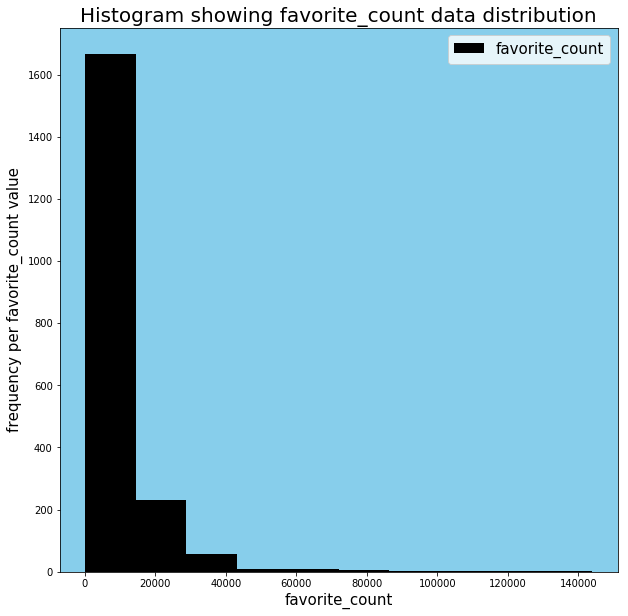

In [526]:
# plotting histogram showing the favorite_count data distribution

n.favorite_count.hist(figsize=(10,10), color='black');
plt.axes().set_facecolor('skyblue');
plt.xlabel('favorite_count', fontsize=15);
plt.ylabel('frequency per favorite_count value', fontsize=15);
plt.title('Histogram showing favorite_count data distribution', fontsize=20);
plt.legend(['favorite_count'], fontsize=15);
plt.grid(False);
plt.rcParams['font.size']=15;

- _the histogram appears to be unimodal since it only has one peak_<br>
- _the favorite count numbers are grouped into seven bins_<br>
- _the first bin of the range 0 to 20000 appears to have the highest number of occurences and it is followed by the other bins as the number of occurences decreases gradually_<br>
- _the 6th bin appears to contain some upper bound outliers in it_<br> 
- _the histogram appears to be skewed to the right, therefore the favorite-count distribution is positively skewed_<br>

In [527]:
# invoking the descriptive statistics pandas method on 'n' with specific interest in the retweet and favorite count data columns 

n[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,1982.000000,1982.000000
mean,2221.972755,7650.790111
std,3986.998620,11304.799918
min,11.000000,66.000000
25%,490.750000,1623.250000
50%,1069.000000,3426.000000
75%,2529.250000,9491.500000
max,70127.000000,143940.000000


- _the describe pandas method returns descriptive values that are imporatnt in helping us determine the exact number of outliers in the two data columns, as well as helping us to explain the right skewed distributions for both data columns_<br><br>
- _both the retweet-count and the favorite-count have large outliers that lie above the upper bound only, for example, the retweet-count has a lower standard deviation than the favorite-count data column which implies that the outliers in the favorite-count data column are larger in value than the outliers of the retweet-count data column_<br><br>
- _under the retweet-count data column, the difference between the mean and the 50th percentile is 1238.5 while under the favorite-count data column, the difference between the mean and the 50th percentile is 4171.3, this implies the significancy of the outliers in the two data columns, the other indicator is the degree of being skewed to the right. The favorite-count data column vales appear to be more skewed to the right to a greater extent than the retweet-count data column values_<br><br>

In [528]:
# making assignments for the lower and upper quartiles based on the displayed descriptive statistics above 

q3_favorite = 9194.25
q1_favorite = 1397.75
iqr_favorite = (q3_favorite-q1_favorite)

- _we are bound to find the number of outliers for the favorite-count data column using inter-quartile-range method_ 

In [529]:
# declaring the methods to be used to obtain the lower and upper bound limits to help us determine the exact outliers beyond those boundaries

lower_bound_fav = q1_favorite - (1.5 * iqr_favorite)
upper_bound_fav = q3_favorite + (1.5 * iqr_favorite) 

- _to determine the lower limit, we use the minus sign, to determine the upper limit, we use the plus sign_

In [530]:
# using the print statement to return the upper limit value

print(upper_bound_fav)

20889.0


- _the upper bound is 20889.0 and will come in handy when creating a pandas dataframe that is strictly focused on all outliers above this limit_

In [531]:
# using the query pandas method to return all the data rows that have values that are higher than the upper limit

n.query('favorite_count > 20889.0')

,tweet_id,timestamp,source,text,url,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_growth_phase,wholesome_rates,jpg_url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,phineas,33638.0,6953.0,secret,1.30,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,tilly,29173.0,5259.0,secret,1.30,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,archie,21945.0,3462.0,secret,1.20,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,darla,36720.0,7171.0,secret,1.30,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,franklin,35115.0,7704.0,secret,1.20,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,none,56565.0,15655.0,secret,1.30,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,zoey,24376.0,3598.0,secret,1.30,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,cassie,27802.0,6053.0,doggo,1.40,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg
10,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10.0,koda,26905.0,6101.0,secret,1.30,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg
11,889880896479866881,2017-07-25 16:11:53,Twitter for iPhone,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13.0,10.0,bruno,24437.0,4129.0,secret,1.30,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg


- _retweet-count has 171 outliers above its upper limit_

In [532]:
# using the print statement to return the lower limit value

print(lower_bound_fav)

-10297.0


- _the lower limit of the favorite count data column is -10297.0, this will come in handy when looking for any outliers below the lower limit_

In [533]:
# using the query pandas method to return an empty pandas dataframe

n.query('favorite_count < -10297.0')

,tweet_id,timestamp,source,text,url,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_growth_phase,wholesome_rates,jpg_url


- _the empty pandas dataframe implies that there isn't any lower bound outliers_

<a id='02'></a>
### Insight 02 + accompanying data visualization

In [534]:
# making assignments for the lower and upper quartiles based on the displayed descriptive statistics above for the retweet_count data column

q3_retweet = 2696.0
q1_retweet = 497.0
iqr_retweet = (q3_retweet-q1_retweet)

- _we are bound to find the number of outliers of the  retweet-count data column using inter-quartile-range method_ 

In [535]:
# declaring the methods to be used to obtain the lower and upper bound limits 
# to help us determine the exact outliers beyond those boundaries

lower_bound_ret = q1_retweet - (1.5 * iqr_retweet)
upper_bound_ret = q3_retweet + (1.5 * iqr_retweet) 

- _to determine the lower limit, we use the minus sign, to determine the upper limit, we use the plus sign_

In [536]:
# using the print statement to return the upper limit value

print(upper_bound_ret)

5994.5


- _the upper bound is 5994.5 and will come in handy when creating a pandas dataframe that is strictly focused on all outliers above this limit_

In [537]:
# using the query pandas method to return all the data rows that have values that are higher than the upper limit

n.query('retweet_count > 5994.5')

,tweet_id,timestamp,source,text,url,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_growth_phase,wholesome_rates,jpg_url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,phineas,33638.0,6953.0,secret,1.30,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,darla,36720.0,7171.0,secret,1.30,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,franklin,35115.0,7704.0,secret,1.20,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,none,56565.0,15655.0,secret,1.30,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,cassie,27802.0,6053.0,doggo,1.40,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg
10,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10.0,koda,26905.0,6101.0,secret,1.30,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg
12,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,none,41810.0,8286.0,puppo,1.30,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg
21,887517139158093824,2017-07-19 03:39:09,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14.0,10.0,roxy.thedoxy,40514.0,9791.0,secret,1.40,https://pbs.twimg.com/ext_tw_video_thumb/88751...
22,887473957103951883,2017-07-19 00:47:34,Twitter for iPhone,This is Canela. She attempted some fancy porch...,https://twitter.com/dog_rates/status/887473957...,13.0,10.0,canela,59867.0,14931.0,secret,1.30,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg
23,887343217045368832,2017-07-18 16:08:03,Twitter for iPhone,You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13.0,10.0,emmylouroo,29446.0,8762.0,secret,1.30,https://pbs.twimg.com/ext_tw_video_thumb/88734...


- _retweet-count has 161 outliers above its upper-limit_ 

In [538]:
# using the print statement to return the lower limit value

print(lower_bound_ret)

-2801.5


In [539]:
# using the query pandas method to return an empty pandas dataframe

n.query('retweet_count < -2801.5')

,tweet_id,timestamp,source,text,url,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_growth_phase,wholesome_rates,jpg_url


- _the empty pandas dataframe implies that there isn't any lower bound outliers_

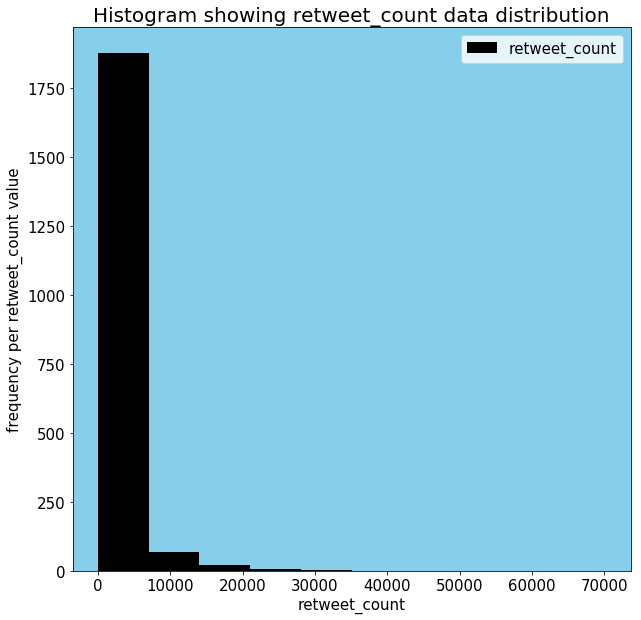

In [540]:
# plotting histogram showing the retweet_count data distribution

n.retweet_count.hist(figsize=(10,10), color='black');
plt.axes().set_facecolor('skyblue');
plt.xlabel('retweet_count', fontsize=15);
plt.ylabel('frequency per retweet_count value', fontsize=15);
plt.title('Histogram showing retweet_count data distribution', fontsize=20);
plt.legend(['retweet_count'], fontsize=15);
plt.grid(False);
plt.rcParams['font.size']=15;

- _the histogram appears to be skewed to the right, therefore the retweet-count distribution is positively skewed_<br>
- _the histogram appears to be unimodal since it only has one peak_<br>
- _the favorite count numbers are grouped into seven bins_<br>
- _the first bin is of the range 0 to 10000 appears to have the highest number of occurences and it is followed by the other bins as the number of occurences decreases gradually_<br>
- _the 7th bin appears to contain some upper bound outliers in it_<br> 

<a id='03'></a>
### Insight 03 + accompanying data visualization

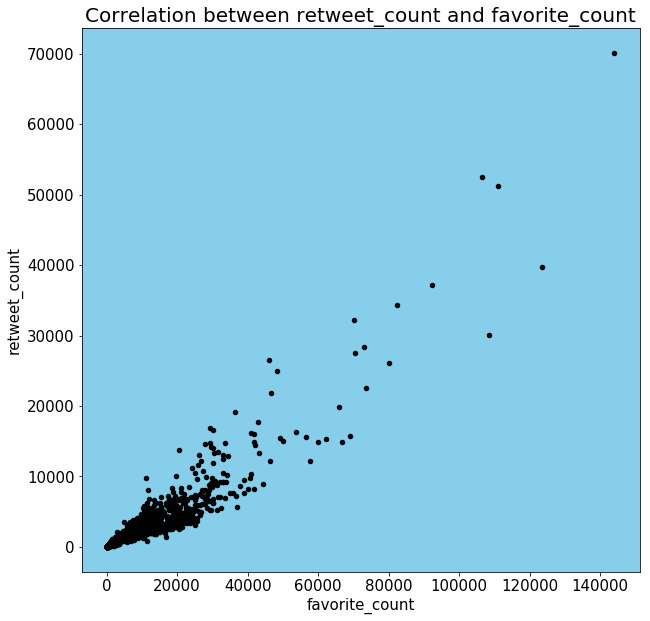

In [541]:
# using the plot.scatter() pandas method to create a scatter plot 
# where the retweet count values are on the y-axis and the favorite count values are on the x-axis

n.plot.scatter(x='favorite_count', y='retweet_count', c= 'black', title = 'Correlation between retweet_count and favorite_count',figsize=(10,10));
plt.axes().set_facecolor('skyblue');
plt.xlabel('favorite_count', fontsize=15);
plt.ylabel('retweet_count', fontsize=15);
plt.title('Correlation between retweet_count and favorite_count',fontsize=20);
plt.rcParams['font.size']=15;

- _there is a positive correlation between the retweet count and the favorite count._<br><br>
- _the retweet count is directly proportional to the favorite count, that is, increase in the retweet count will lead to increase in the favorite count_<br><br>
- _the graph also displays a large number of outliers, that is, about 332 as earlier determined_<br><br>

<a id='04'></a>
### Insight 04 + accompanying data visualization

In [542]:
# assigning a pandas dataframe to a variable named 'a_1' with only two specified data columns 

a_1 = twi_arc_enh_dataset_combined[['dog_growth_phase','rating_numerator']]

- _now taking a closer look at the dog stages and the rating values_

In [543]:
# displaying about five dog stages with their respective counts and mean ratings

a_2 = a_1.groupby('dog_growth_phase')['rating_numerator'].agg(['count', 'mean']).reset_index()

- _secret has the highest number of counts with an average rating of 12.2 followed by pupper with an average rating of 10.7_

In [544]:
# returning the pandas dataframe of the aggregated data 

a_2

,dog_growth_phase,count,mean
0,doggo,63,11.888889
1,floofer,8,11.875000
2,pupper,212,10.652217
3,puppo,23,12.043478
4,secret,1686,12.250599


- _floofer has the least number of counts at 8 and an average rating of 11.9_

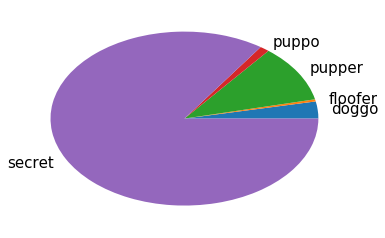

In [545]:
# showing a simplified pie-chart version of the aggregated data distribution above 

plt.pie(a_2['count'], labels = a_2['dog_growth_phase']);
plt.figure(figsize =(10, 10));
plt.show();

- _the dogs with unknown stages while being represented by secret appear to be the kings at the moment with the highest number of counts and the mean rating value_<br><br>
- _the floofer stage dogs have the least number of counts at 8 but not the average rating_<br><br>
- _the pupper stage has the least mean rating at 10.7_<br><br>

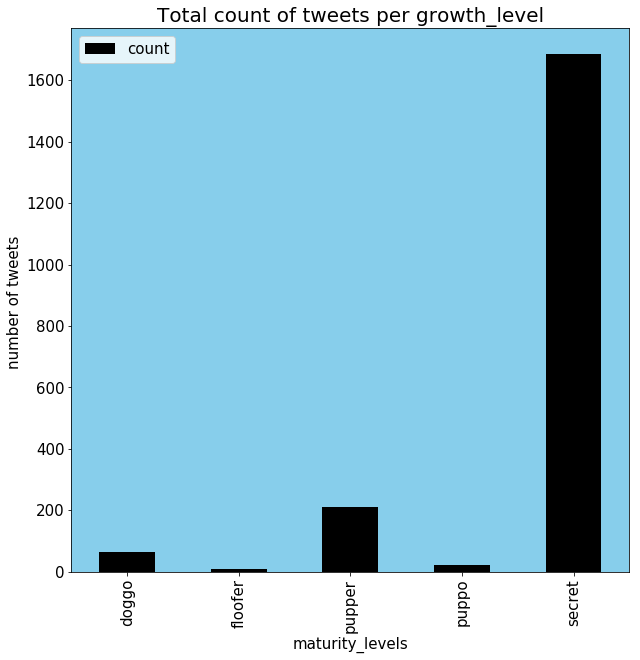

In [546]:
# creating the bar plot showing the number of tweets against the dog growth stages

a_2.plot(x='dog_growth_phase',y='count',kind='bar', figsize=(10,10), color = 'black');
plt.axes().set_facecolor('skyblue'); 
plt.xlabel("maturity_levels", fontsize=15);
plt.ylabel("number of tweets ", fontsize=15);
plt.title("Total count of tweets per growth_level", fontsize=20);
plt.show();
plt.rcParams['font.size']=15;

- _the vertical bar graph clearly shows that the dogs with unknown dog stages while being represented by secret have the highest number of tweets_<br><br>
- _this creates an impression about how insecure most people feel online today by not revealing the specifics of their dogs in terms of age and growth_<br><br>
- _it is also able to show that the floofer dog stage has the least number of tweets_<br><br>

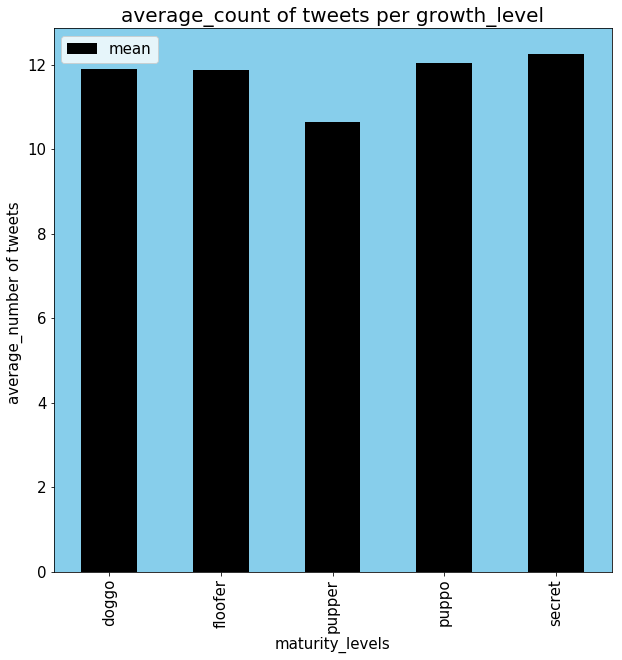

In [547]:
# a vertical bar graph showing the average ratings for the dog stages

a_2.plot(x='dog_growth_phase',y='mean',kind='bar',figsize=(10,10), color = 'black');
plt.axes().set_facecolor('skyblue'); 
plt.xlabel("maturity_levels", fontsize=15);
plt.ylabel("average_number of tweets ", fontsize=15);
plt.title("average_count of tweets per growth_level", fontsize=20);
plt.show();
plt.rcParams['font.size']=15;

- _puppo appears to have the highest mean rating apart from the unknown category_<br><br>
- _pupper appears to have the lowest mean rating_<br><br>
- _this gives an impression that people seem to be more attracted to dogs in the 'older puppy' age category and less attracted to dogs in the 'young puppy' age category_<br><br> 

<a id='05'></a>
### Conclusions

- _The dog growth stage for most of the dogs was not revealed in the text descriptions. Most of the text descriptions did not have hints either. This implies that some account followers are either not insecure and prefer anonymity or did not find it relevant_<br><br>
- _Puppers have the highest number of retweets while Puppos have the highest ratings, puppers are the true young puppies while puppos are the older puppies._<br><br>

### Resourceful Websites

- _geeksforgeeks.org_<br><br>
- _stackoverflow.com_<br><br>
- _towardsdatascience.com_<br><br>